<a id="2"></a>
# <p style="padding:10px;background-color:white ;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import Libraries</p>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from colorama import Back
import seaborn as sns
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import os

<a id="2"></a>
# <p style="padding:10px;background-color:white ;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import data</p>

In [2]:
notebook_directory = os.getcwd()
parent_directory = os.path.dirname(notebook_directory)
df = pd.read_csv(os.path.join(parent_directory, "data", "hepatitisC.csv"))

In [3]:
print(df.shape)
df.head(10).style.set_properties(**{'background-color': '#F6E7E8',
                           'color': 'black',
                           'border-color': 'black'})


(615, 14)


,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.500000,52.500000,7.700000,22.100000,7.500000,6.930000,3.230000,106.000000,12.100000,69.000000
1,2,0=Blood Donor,32,m,38.500000,70.300000,18.000000,24.700000,3.900000,11.170000,4.800000,74.000000,15.600000,76.500000
2,3,0=Blood Donor,32,m,46.900000,74.700000,36.200000,52.600000,6.100000,8.840000,5.200000,86.000000,33.200000,79.300000
3,4,0=Blood Donor,32,m,43.200000,52.000000,30.600000,22.600000,18.900000,7.330000,4.740000,80.000000,33.800000,75.700000
4,5,0=Blood Donor,32,m,39.200000,74.100000,32.600000,24.800000,9.600000,9.150000,4.320000,76.000000,29.900000,68.700000
5,6,0=Blood Donor,32,m,41.600000,43.300000,18.500000,19.700000,12.300000,9.920000,6.050000,111.000000,91.000000,74.000000
6,7,0=Blood Donor,32,m,46.300000,41.300000,17.500000,17.800000,8.500000,7.010000,4.790000,70.000000,16.900000,74.500000
7,8,0=Blood Donor,32,m,42.200000,41.900000,35.800000,31.100000,16.100000,5.820000,4.600000,109.000000,21.500000,67.100000
8,9,0=Blood Donor,32,m,50.900000,65.500000,23.200000,21.200000,6.900000,8.690000,4.100000,83.000000,13.700000,71.300000
9,10,0=Blood Donor,32,m,42.400000,86.300000,20.300000,20.000000,35.200000,5.460000,4.450000,81.000000,15.900000,69.900000


In [5]:
df.shape

(615, 14)

In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)



<a id="2"></a>
# <p style="padding:10px;background-color:white ;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Preprocessing</p>

Function: describe(Dataset (df))

This function generates a summary report for the input dataset (`Dataset (df)`). The report includes various statistics for each column in the dataset, such as data type, count of non-null values, number of unique values, count of missing values, minimum value (if numeric), and maximum value (if numeric).

Parameters:
- `Dataset (df)`: pandas DataFrame
  - The input dataset for which the summary report is to be generated.

Returns:
- `output`: pandas DataFrame
  - A DataFrame containing the summary statistics for each column in the input dataset.

Description:
1. Initialize empty lists to store information about each column.
2. Iterate over each column in the dataset and extract the following information:
   - Variable name
   - Data type
   - Count of non-null values
   - Number of unique values
   - Count of missing values
   - Minimum value (if numeric)
   - Maximum value (if numeric)
3. Create a pandas DataFrame using the collected information.
4. Return the DataFrame as output.


In [5]:
def describe(df):

    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    min_ = []
    max_ = []


    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())

        if df[item].dtypes == 'float64' or df[item].dtypes == 'int64':
            min_.append(df[item].min())
            max_.append(df[item].max())
        else:
            min_.append('Str')
            max_.append('Str')


    output = pd.DataFrame({
        'variable': variables,
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing value': missing,
        'Min': min_,
        'Max': max_
    })
    return output

describe(df)

,variable,dtype,count,unique,missing value,Min,Max
0,Category,object,615,5,0,Str,Str
1,Age,int64,615,49,0,19,77
2,Sex,object,615,2,0,Str,Str
3,ALB,float64,615,190,1,14.9,82.2
4,ALP,float64,615,415,18,11.3,416.6
5,ALT,float64,615,342,1,0.9,325.3
6,AST,float64,615,297,0,10.6,324.0
7,BIL,float64,615,188,0,0.8,254.0
8,CHE,float64,615,407,0,1.42,16.41
9,CHOL,float64,615,314,10,1.43,9.67


In [7]:

Styles = [dict(selector = "caption",
               props = [("color", "white"),
                        ("text-align", "center"),
                       ('font-size', '15pt'),

                       ('background-color', '#E72B3B')])]
desc_df = describe(df)
desc_df = desc_df.style.set_caption('Overview of the dataset').set_table_styles(Styles)
desc_df.set_properties(**{'background-color': '#F6E7E8',
                           'color': 'black',
                           'border-color': 'black'})

,variable,dtype,count,unique,missing value,Min,Max
0,Category,object,615,5,0,Str,Str
1,Age,int64,615,49,0,19,77
2,Sex,object,615,2,0,Str,Str
3,ALB,float64,615,190,1,14.900000,82.200000
4,ALP,float64,615,415,18,11.300000,416.600000
5,ALT,float64,615,342,1,0.900000,325.300000
6,AST,float64,615,297,0,10.600000,324.000000
7,BIL,float64,615,188,0,0.800000,254.000000
8,CHE,float64,615,407,0,1.420000,16.410000
9,CHOL,float64,615,314,10,1.430000,9.670000


In [8]:
import pandas as pd

def extract_numerical_column_names(df):
    numerical_cols = df.select_dtypes(include=['number']).columns
    return numerical_cols.tolist()
numerical_column_names = extract_numerical_column_names(df)
print(numerical_column_names)


['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']


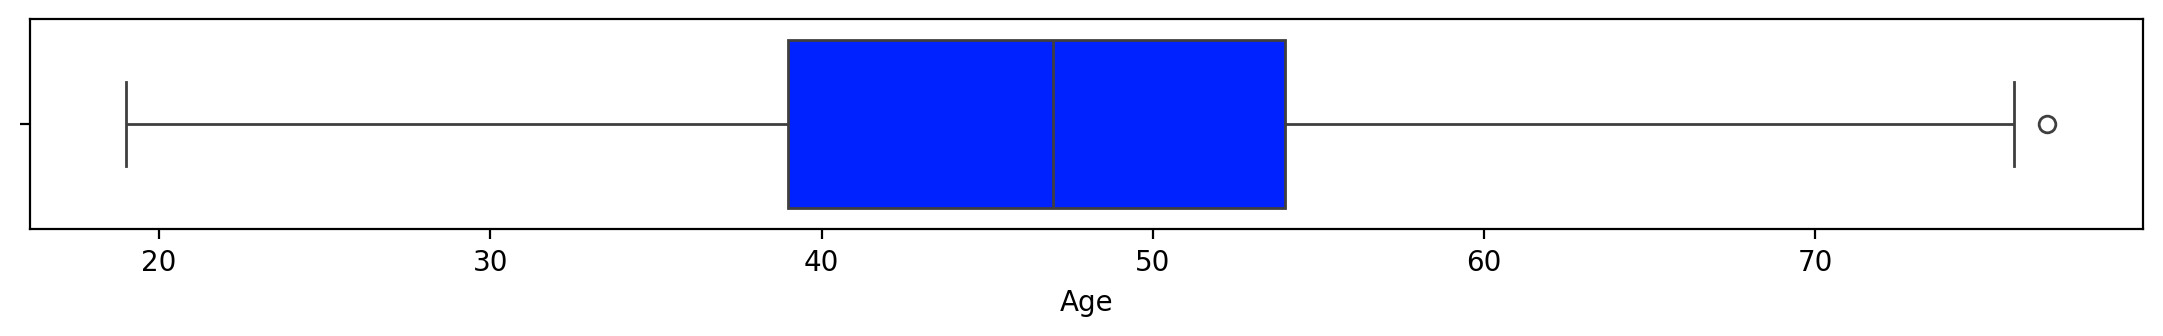

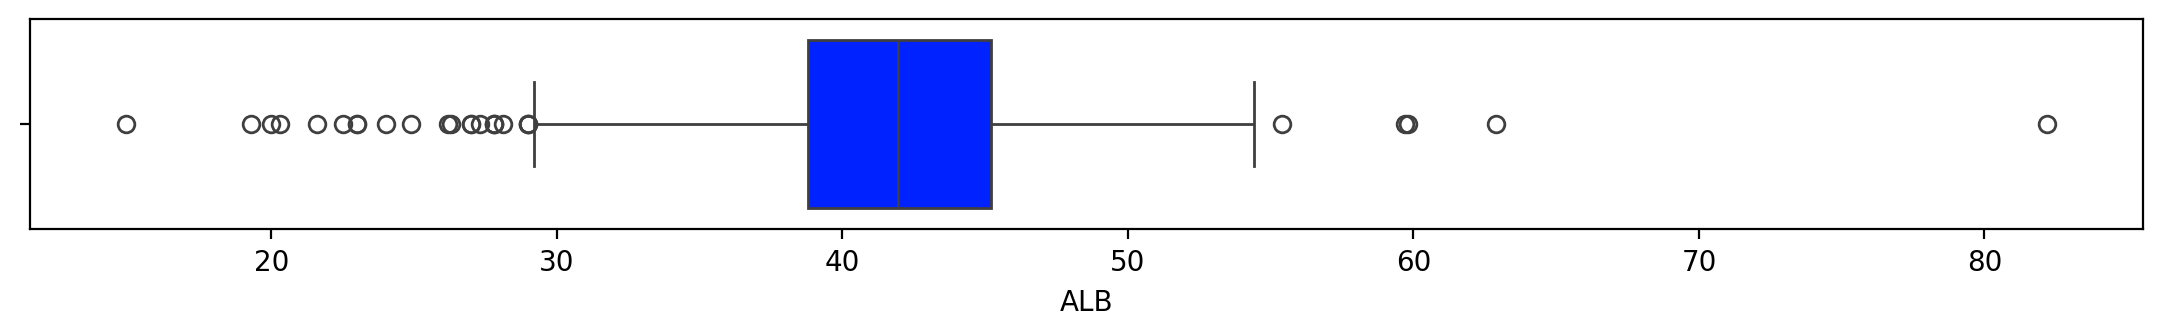

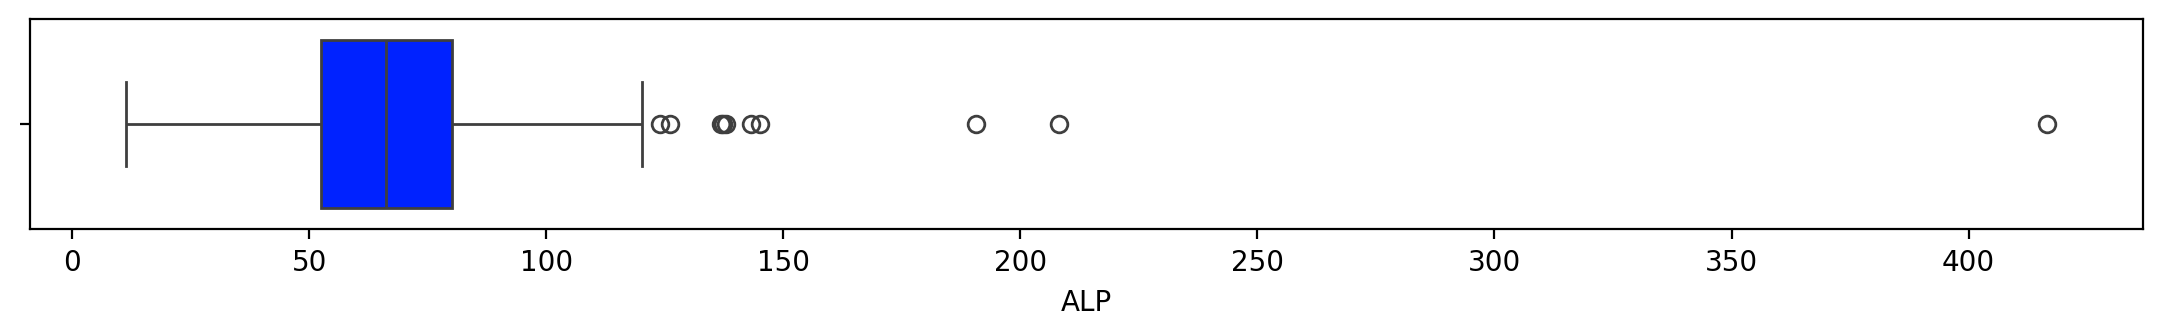

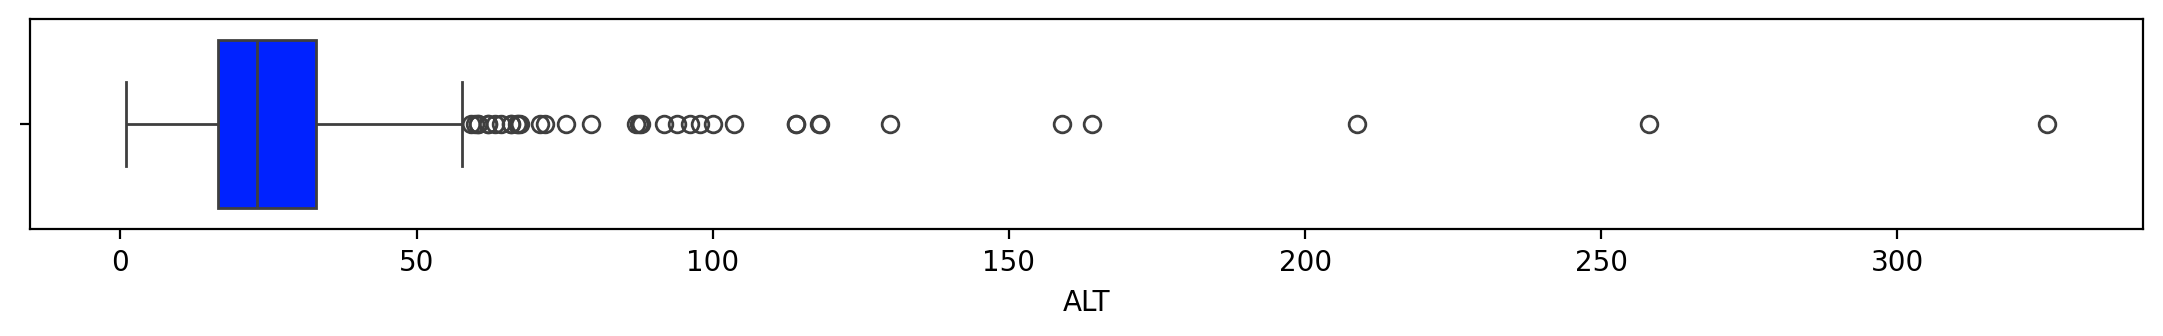

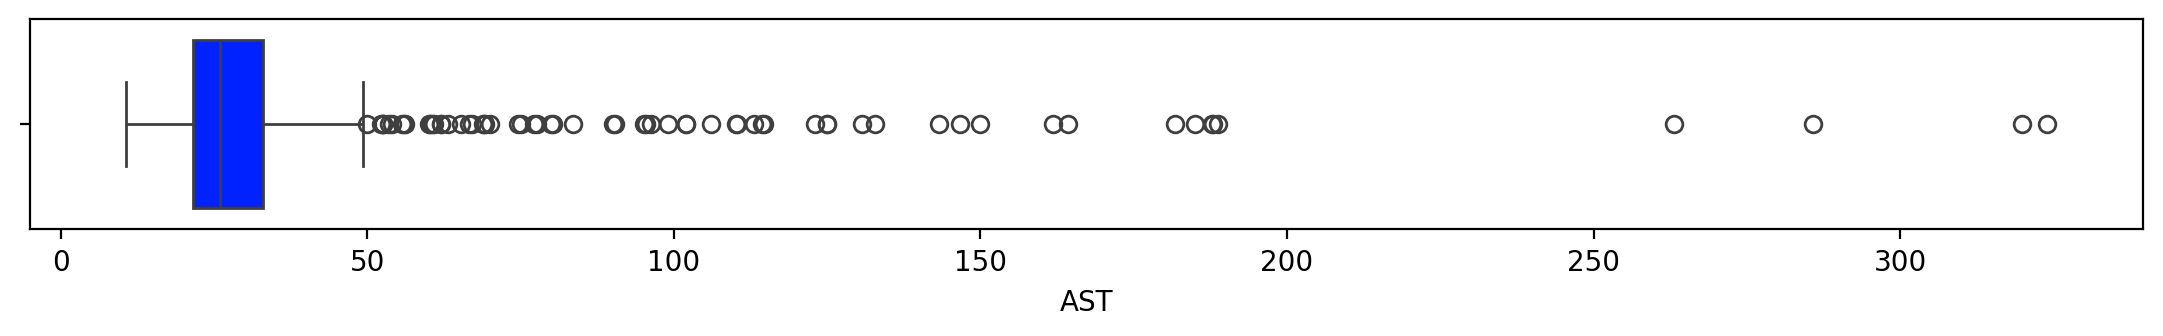

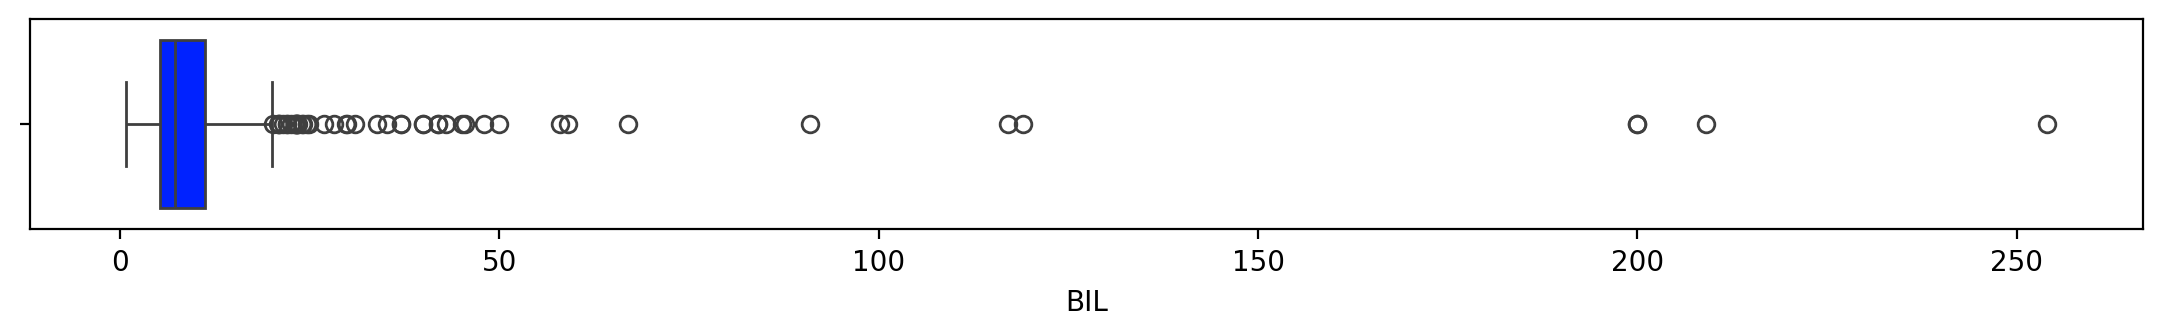

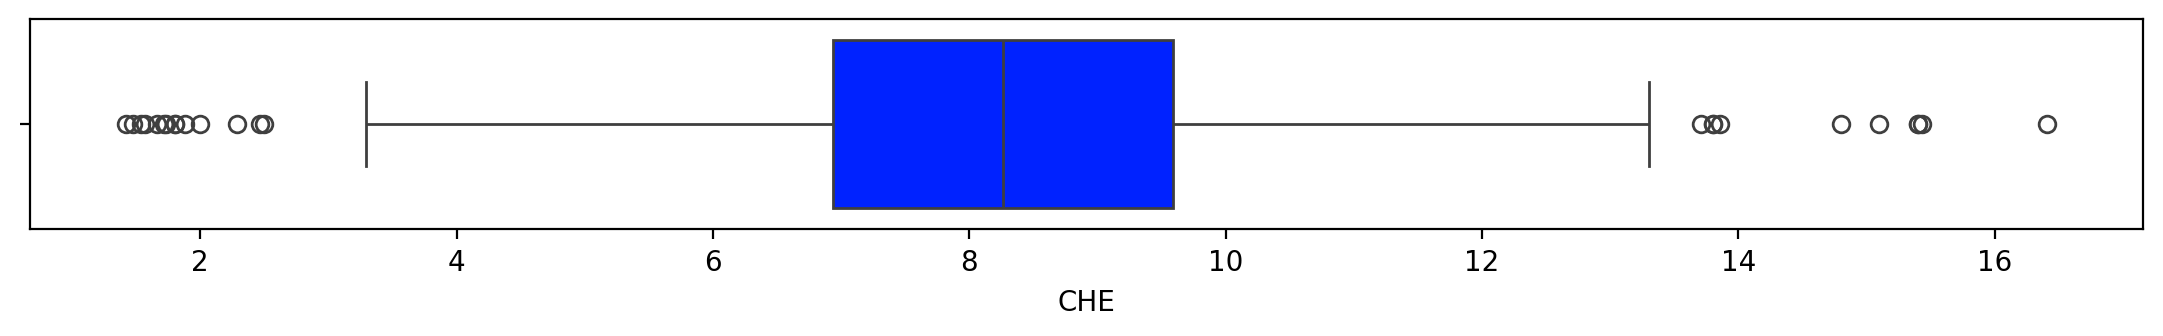

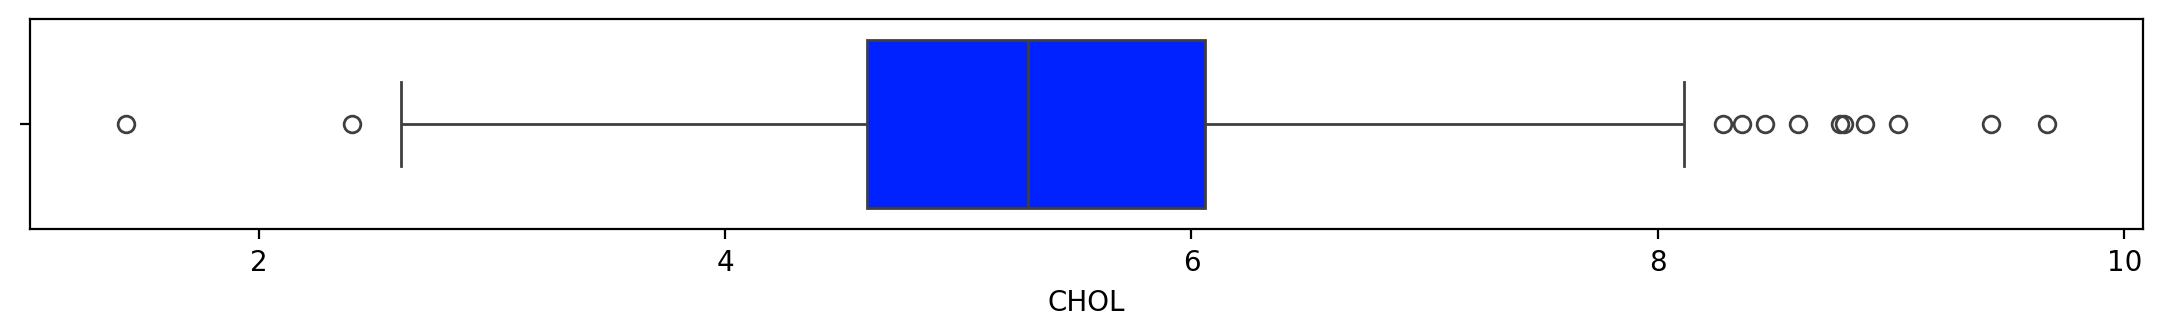

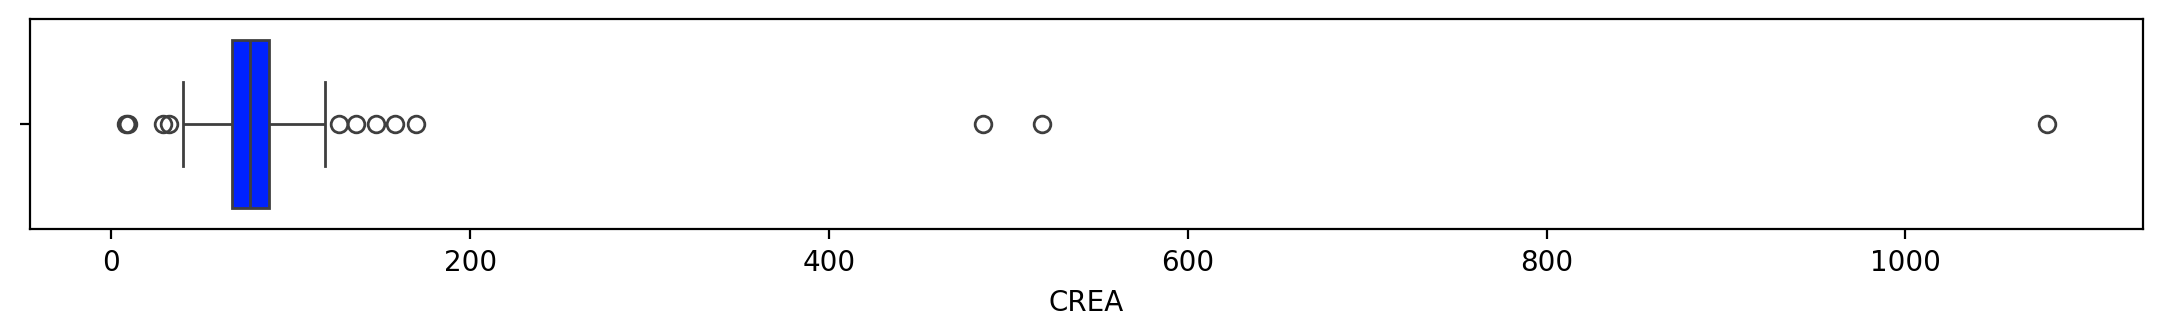

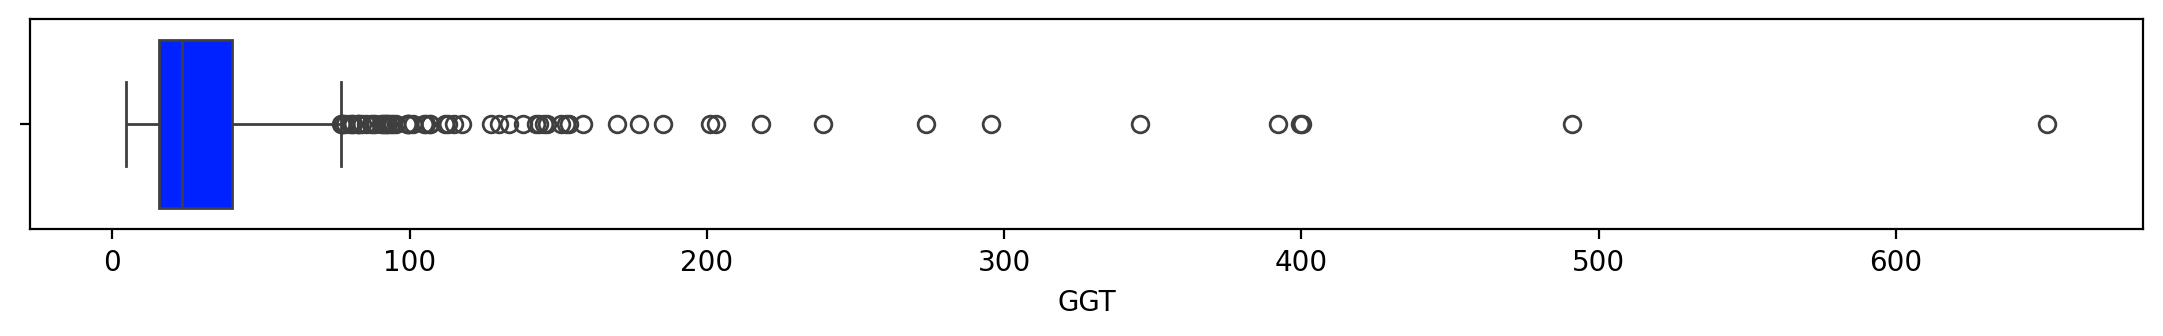

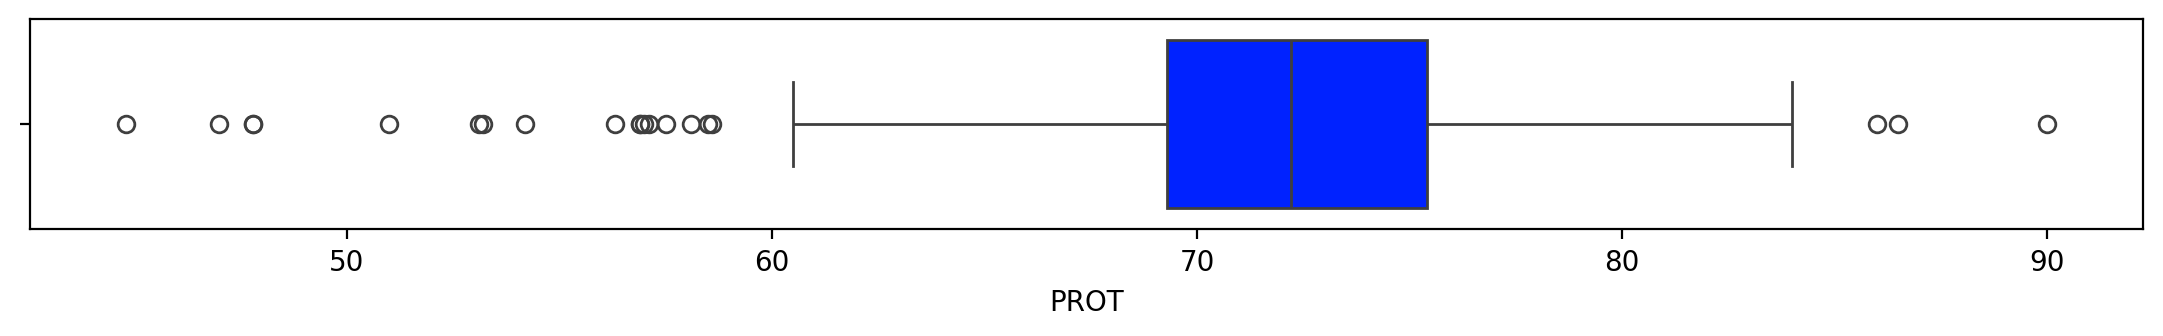

In [9]:
for i in range(len(numerical_column_names)):
    fig = plt.figure(figsize = [30,3], dpi=200)
    plt.subplot(2,2,1)
    sns.boxplot(x = numerical_column_names[i], data = df,
           boxprops = dict(facecolor = "#0022FF"))
    plt.show()

In [10]:
# Define a function to remove noise based on the provided indexes
def remove_noise(noise_list):
    df.drop(index=noise_list, inplace=True)

# Define indexes of rows with noise for each condition
alt_noise = df[df["ALT"] > 150].index
remove_noise(alt_noise)

asl_noise = df[df['AST'] > 200].index
remove_noise(asl_noise)

bil_noise = df[df['BIL'] > 200].index
remove_noise(bil_noise)

che_noise = df[df['CHE'] > 14].index
remove_noise(che_noise)

chra_noise = df[df['CREA'] > 200].index
remove_noise(chra_noise)

ggt_noise = df[df['GGT'] > 250].index
remove_noise(ggt_noise)

prot_noise = df[(df['PROT'] > 80) | (df['PROT'] < 55)].index  # Corrected condition for PROT
remove_noise(prot_noise)

age_noise = df[df['Age']>70].index
df.drop(index=age_noise[0], inplace=True)


In [11]:
df.shape

(552, 13)

In [13]:
from scipy.stats import zscore
def handle_outliers_zscore(data, column, threshold=3):
    z_scores = zscore(data[column])
    outliers = (z_scores > threshold) | (z_scores < -threshold)

    # Replace outliers with the median
    data.loc[outliers, column] = data[column].median()
    return data


numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
for column in numerical_columns:
    df = handle_outliers_zscore(df, column)

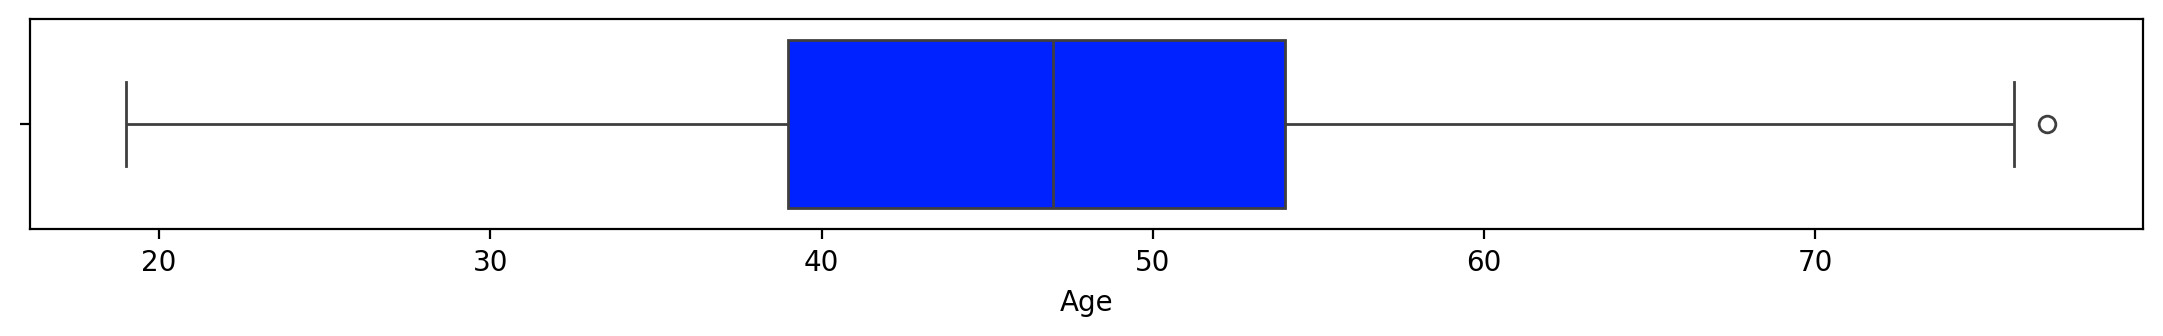

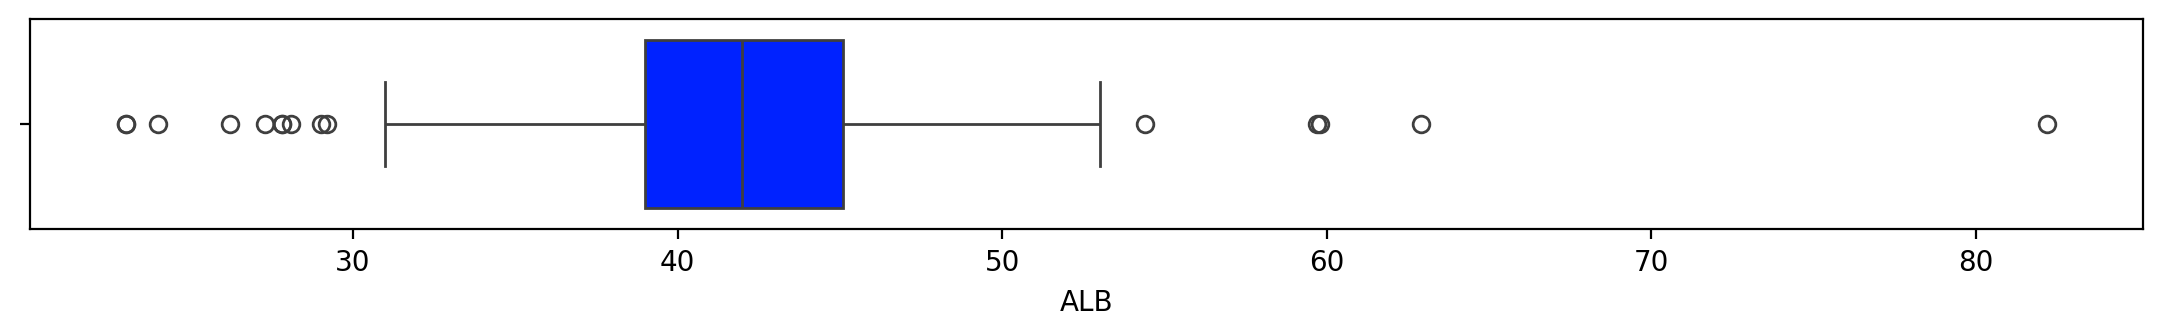

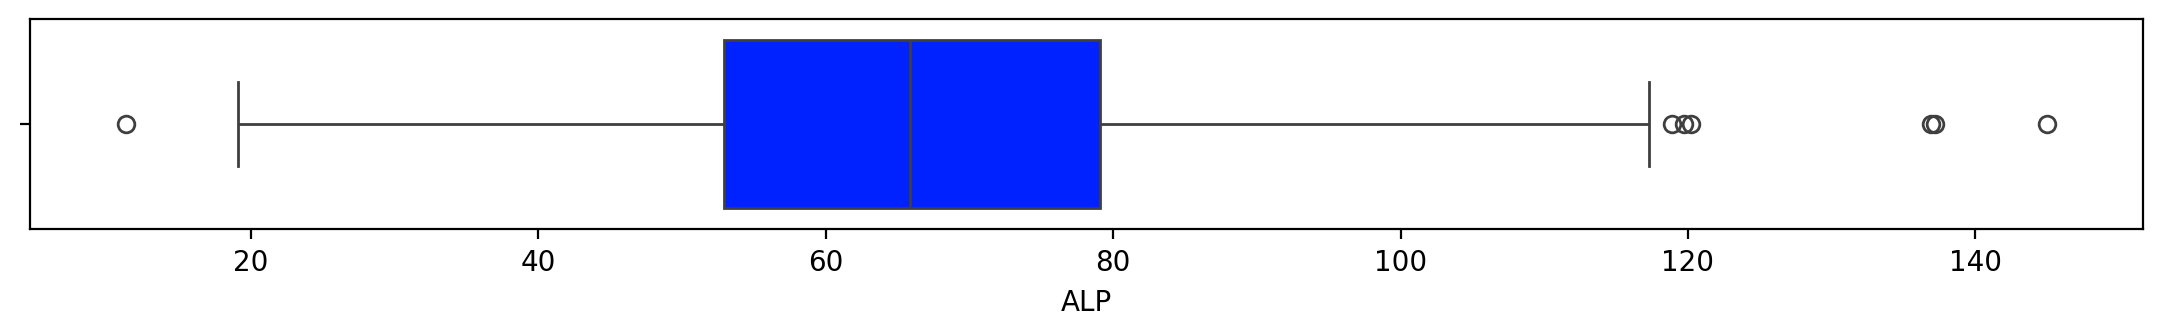

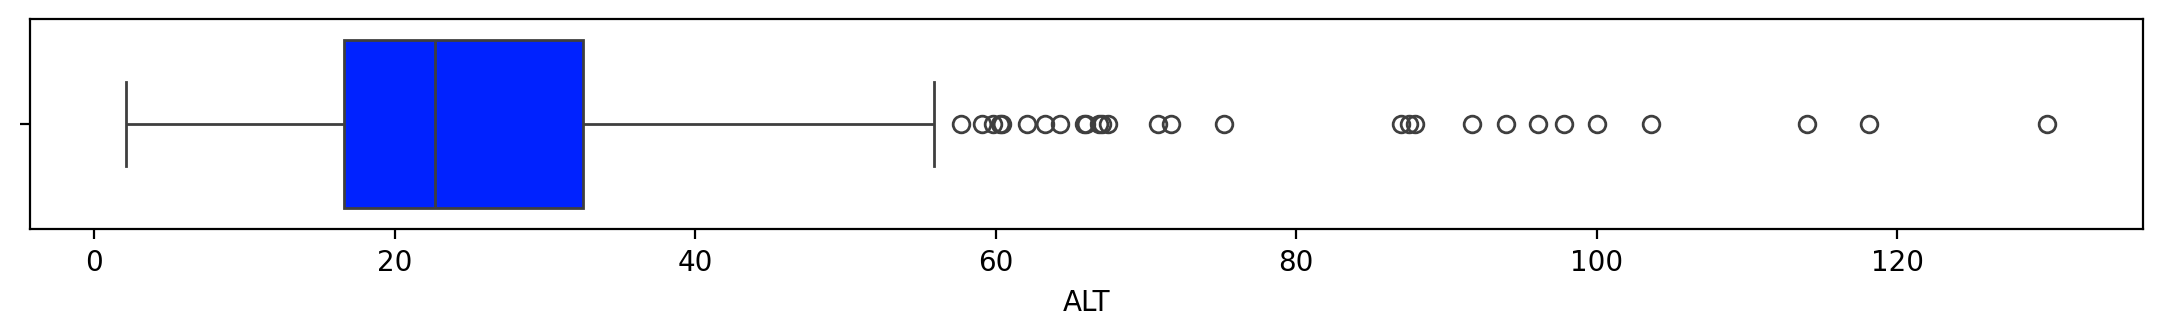

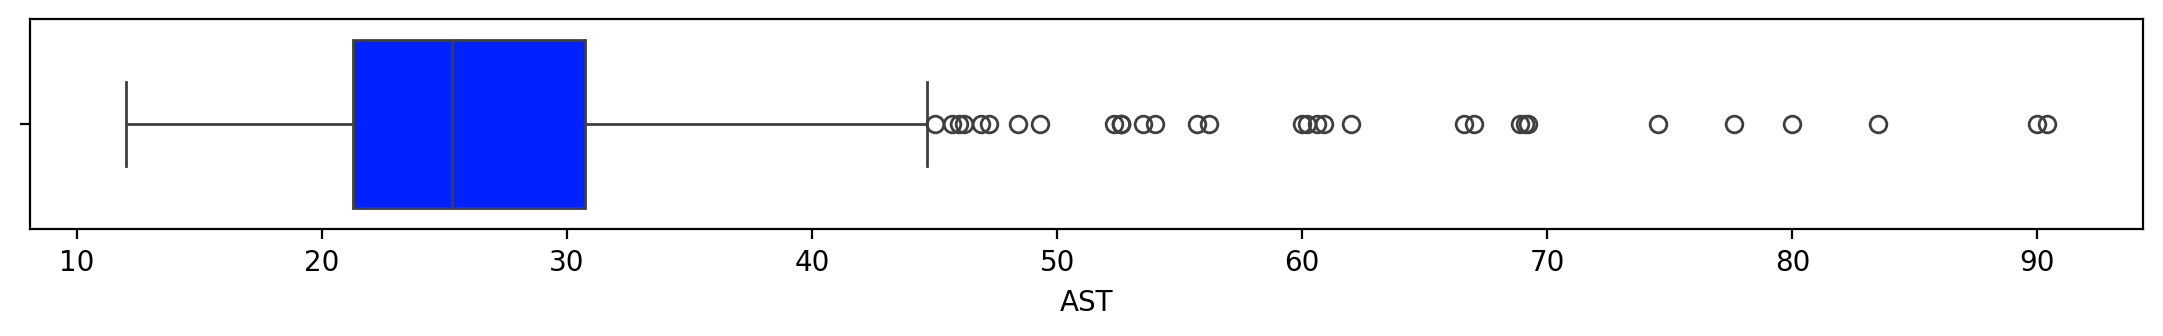

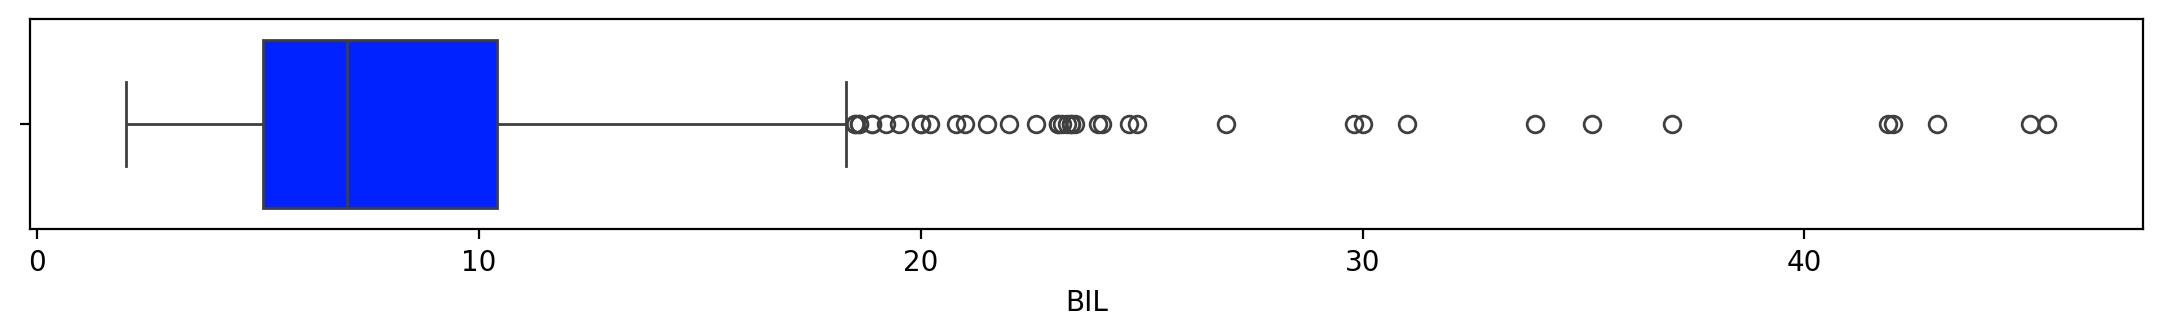

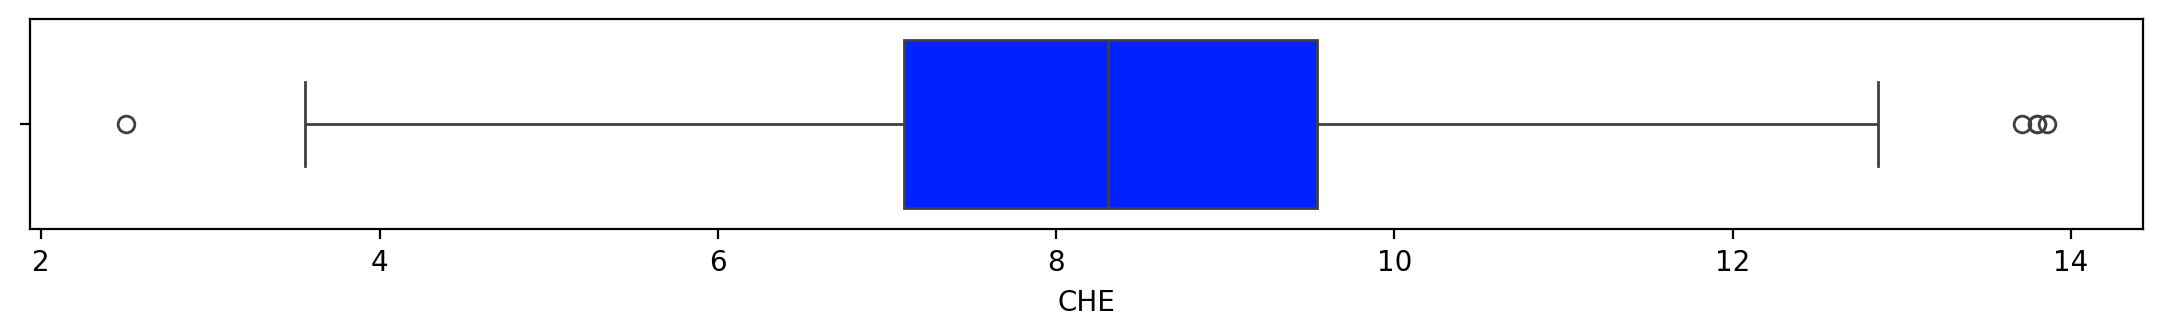

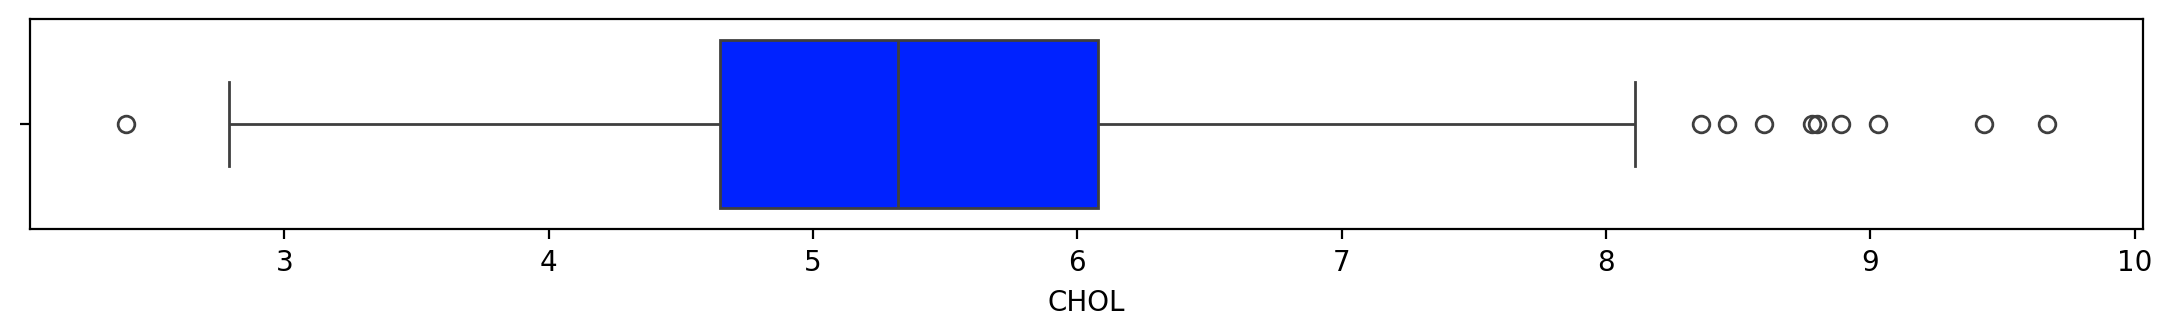

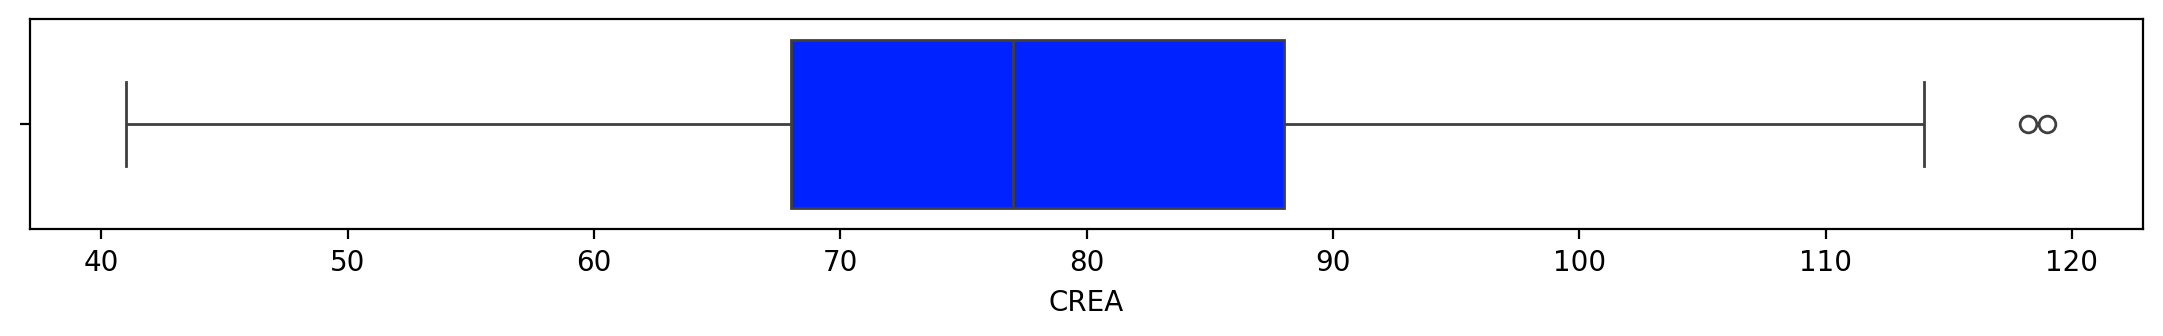

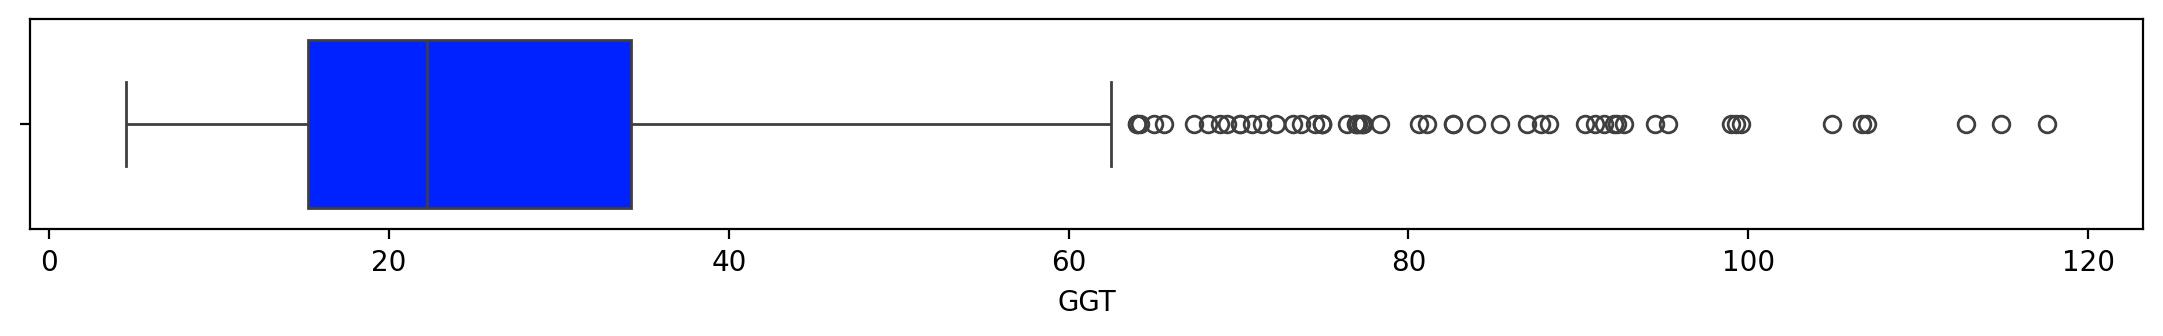

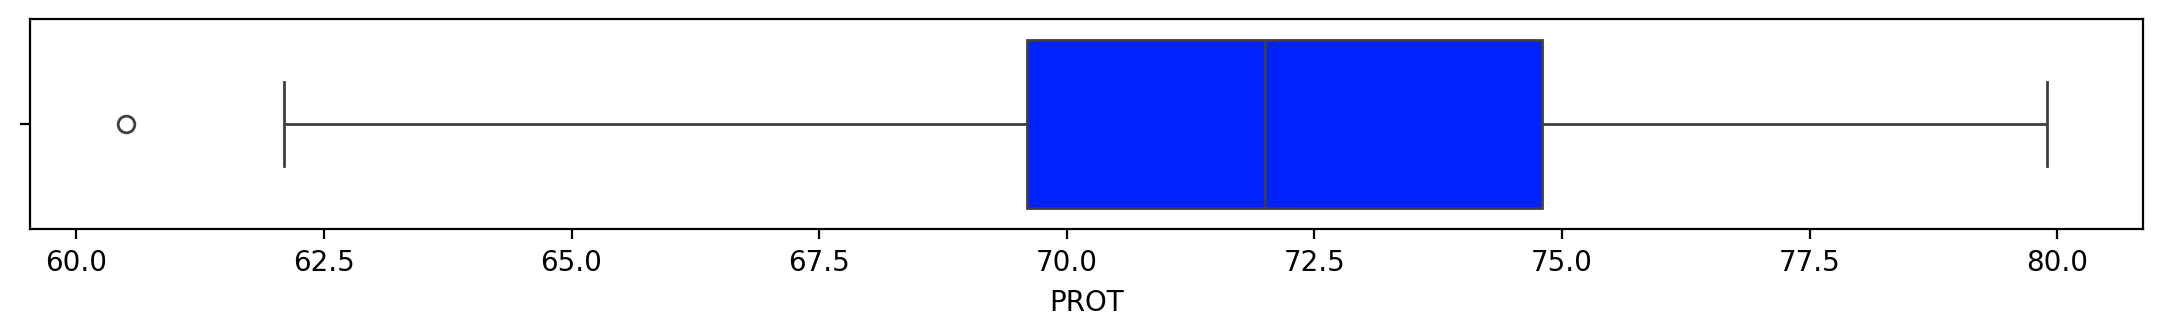

In [13]:
for i in range(len(numerical_column_names)):
    fig = plt.figure(figsize = [30,3], dpi=200)
    plt.subplot(2,2,1)
    sns.boxplot(x = numerical_column_names[i], data = df,
           boxprops = dict(facecolor = "#0022FF"))
    plt.show()

Index(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')


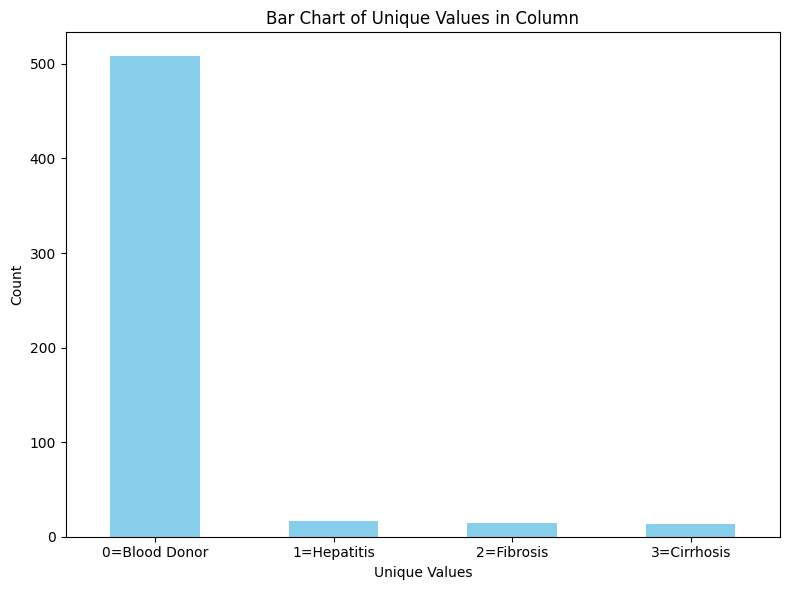

In [14]:
print(df.columns)
unique_values_counts = df['Category'].value_counts()

# Create bar chart
plt.figure(figsize=(8, 6))
unique_values_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.title('Bar Chart of Unique Values in Column')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [15]:
df['Category'] = df['Category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0,
                             "1=Hepatitis" : 1, "2=Fibrosis" : 1, "3=Cirrhosis" : 1})
df['Sex'] = df['Sex'].map({'m': 1, 'f': 0})

In [16]:
new_cols = {'ALB':'Albumin Blood Test (ALB) g/L ',
            'ALP':  'Alkaline Phosphatase Test (ALP) IU/L',
            'ALT': 'Alanine Transaminase Test (ALT) U/L',
            'AST' : 'Aspartate Transaminase Test (AST) U/L',
            'BIL': 'Bilirubin Blood Test (BIL) µmol/L',
            'CHE' : 'Cholinesterase (CHE) kU/L' ,
            'CHOL' : 'Cholesterol (CHOL) mmol/L',
            'CREA' : 'Creatinine Blod Test (CREA) µmol/L',
            'GGT' : 'Gamma-Glutamyl Transpeptidase Test (GGT) U/L',
            'PROT' : 'Protein Blood Test (PROT) g/L'}

df.rename(columns=new_cols ,inplace=True)
df.head()

,Category,Age,Sex,Albumin Blood Test (ALB) g/L,Alkaline Phosphatase Test (ALP) IU/L,Alanine Transaminase Test (ALT) U/L,Aspartate Transaminase Test (AST) U/L,Bilirubin Blood Test (BIL) µmol/L,Cholinesterase (CHE) kU/L,Cholesterol (CHOL) mmol/L,Creatinine Blod Test (CREA) µmol/L,Gamma-Glutamyl Transpeptidase Test (GGT) U/L,Protein Blood Test (PROT) g/L
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [17]:
df.fillna(df.median() ,inplace=True)
describe(df)

,variable,dtype,count,unique,missing value,Min,Max
0,Category,int64,552,2,0,0.0,1.00
1,Age,int64,552,49,0,19.0,77.00
2,Sex,int64,552,2,0,0.0,1.00
3,Albumin Blood Test (ALB) g/L,float64,552,168,0,23.0,82.20
4,Alkaline Phosphatase Test (ALP) IU/L,float64,552,385,0,11.3,145.00
5,Alanine Transaminase Test (ALT) U/L,float64,552,308,0,2.1,130.00
6,Aspartate Transaminase Test (AST) U/L,float64,552,250,0,12.0,90.40
7,Bilirubin Blood Test (BIL) µmol/L,float64,552,168,0,2.0,45.50
8,Cholinesterase (CHE) kU/L,float64,552,363,0,2.5,13.86
9,Cholesterol (CHOL) mmol/L,float64,552,294,0,2.4,9.67


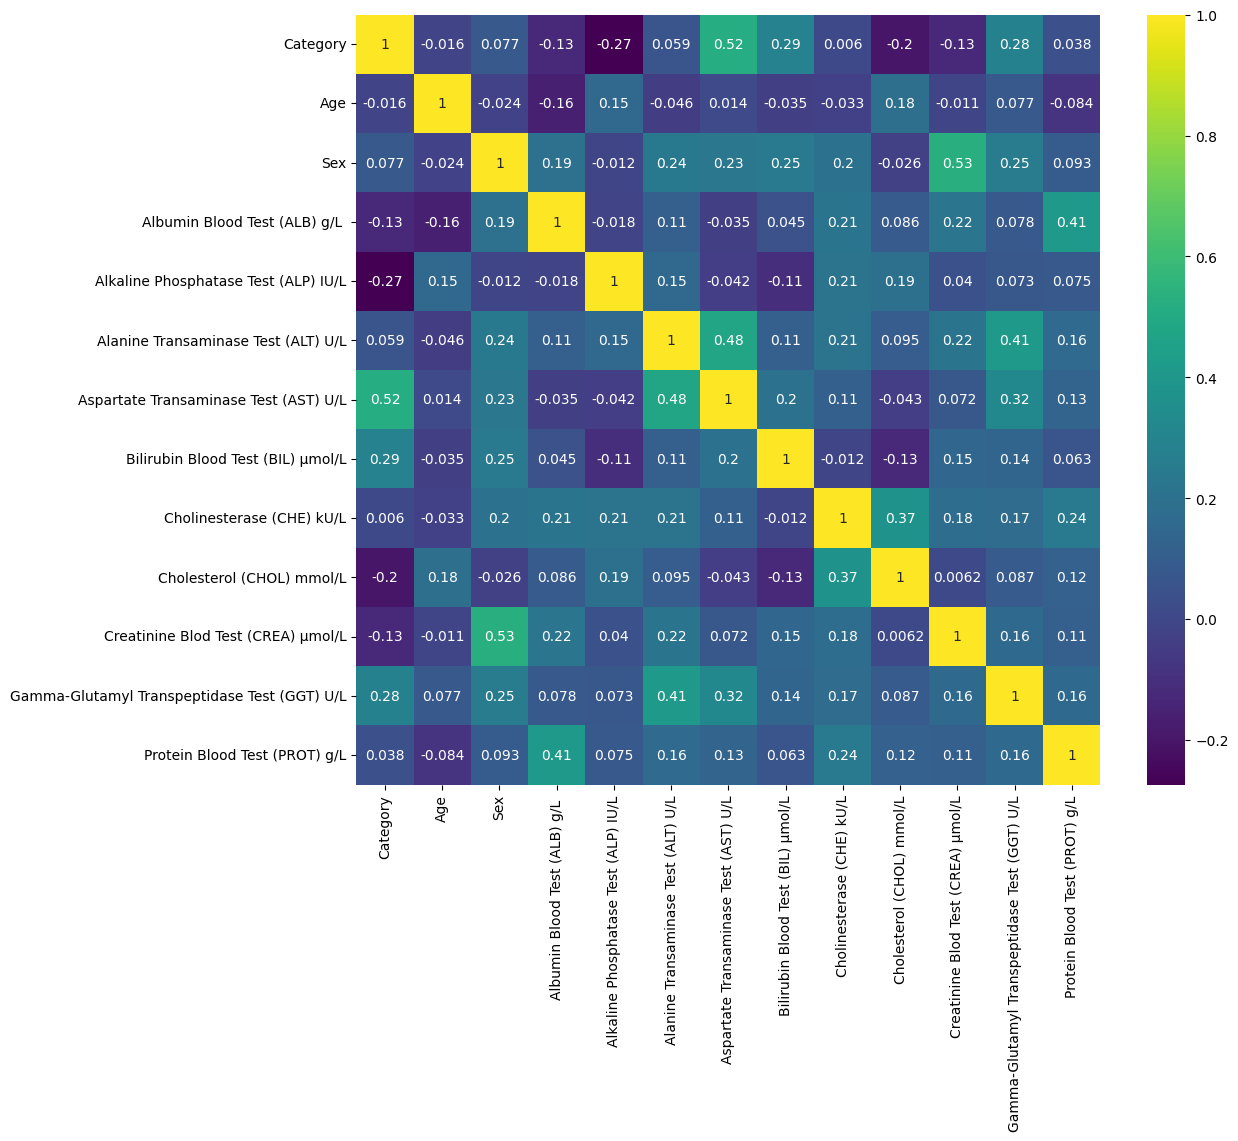

In [18]:
corr = df.corr()
fig , ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr , annot=True , cmap='viridis')
plt.show()

## Correlation Analysis

### Positive Correlation (close to 1)
- When one variable increases, the other tends to also increase. For example, there is a strong positive correlation (0.62) between "Aspartate Transaminase Test (AST) U/L" and "Category".

### Negative Correlation (close to -1)
- When one variable increases, the other tends to decrease. For example, there is a moderate negative correlation (-0.23) between "Category" and "Cholinesterase (CHE) kU/L".

### No Correlation (close to 0)
- There is no apparent linear relationship between the variables. For example, "Age" and "Albumin Blood Test (ALB) g/L" have a correlation coefficient of -0.20, indicating a weak negative correlation.

### Key Observations
1. There is a strong positive correlation (0.62) between "Aspartate Transaminase Test (AST) U/L" and "Category".
2. "Albumin Blood Test (ALB) g/L" has a moderate negative correlation (-0.18) with "Category".
3. "Cholesterol (CHOL) mmol/L" and "Cholinesterase (CHE) kU/L" have a relatively strong positive correlation (0.42).
4. "Alanine Transaminase Test (ALT) U/L" and "Category" have a weak positive correlation (0.09).
5. "Age" and "Sex" have a weak negative correlation (-0.02).


In [19]:
print(f'Total of Healthy People : {df.Category.value_counts()[0]}')
print(f'Total of Infected People : {df.Category.value_counts()[1]}')

Total of Healthy People : 508
Total of Infected People : 44


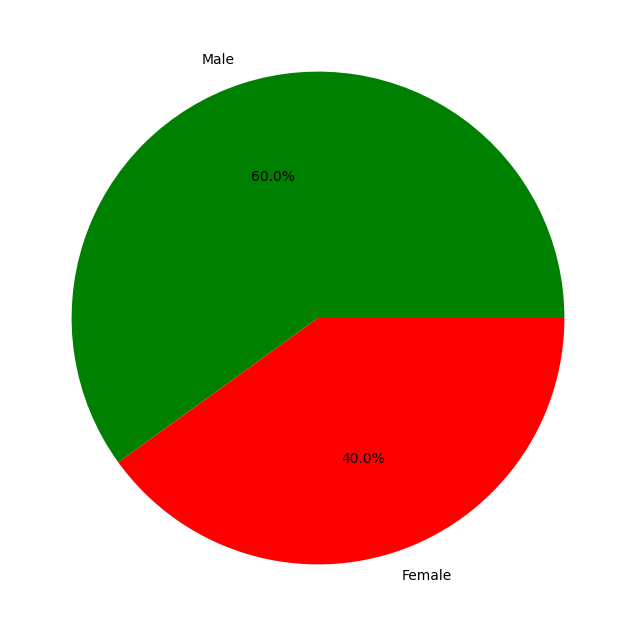

In [20]:
fig, ax = plt.subplots(figsize=(8,8))
plt.pie(x=df["Sex"].value_counts(),
        colors=["green","red"],
        labels=["Male","Female"],
        autopct= '%1.1f%%',
        )
plt.show()

In [21]:
x = df.drop('Category' , axis = 1)
x.head()

,Age,Sex,Albumin Blood Test (ALB) g/L,Alkaline Phosphatase Test (ALP) IU/L,Alanine Transaminase Test (ALT) U/L,Aspartate Transaminase Test (AST) U/L,Bilirubin Blood Test (BIL) µmol/L,Cholinesterase (CHE) kU/L,Cholesterol (CHOL) mmol/L,Creatinine Blod Test (CREA) µmol/L,Gamma-Glutamyl Transpeptidase Test (GGT) U/L,Protein Blood Test (PROT) g/L
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [22]:
y = df['Category']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Category, dtype: int64

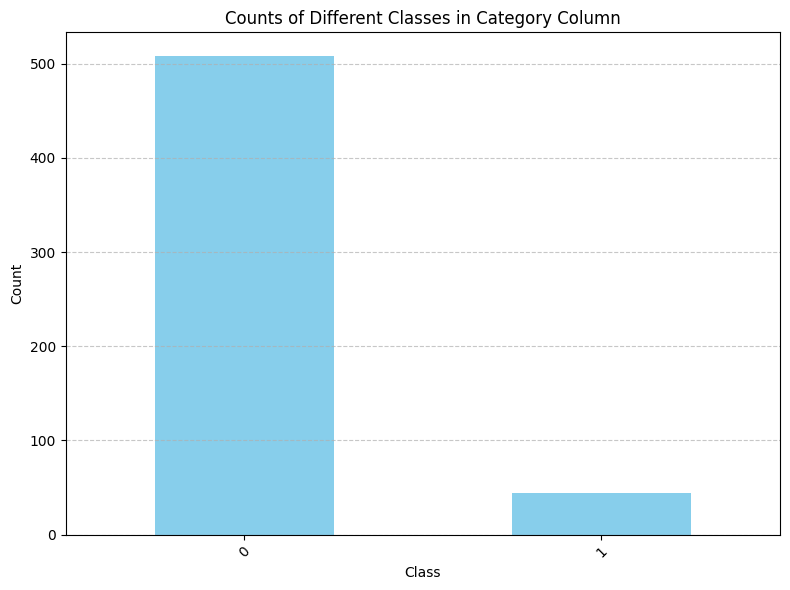

In [23]:
class_counts = df['Category'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Different Classes in Category Column')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<a id="2"></a>
# <p style="padding:10px;background-color:white ;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Smote resampling</p>


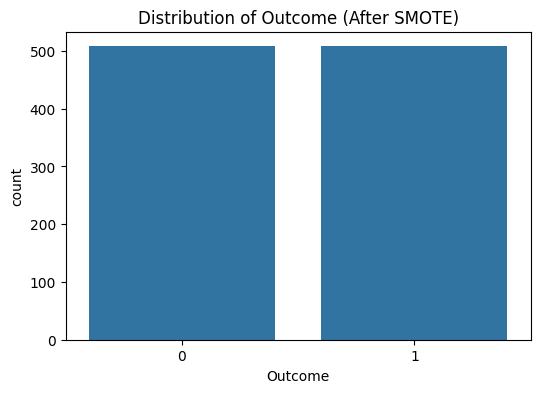

In [24]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

smote = SMOTE(random_state=42, n_jobs=-1, sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(x, y)
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=x.columns), pd.Series(y_resampled, name='Outcome')], axis=1)
filepath = os.path.join(parent_directory, "cleanData", "hepetitis.csv")
df_resampled.to_csv(filepath, index=False)
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df_resampled)
plt.title('Distribution of Outcome (After SMOTE)')
plt.show()


In [25]:
Styles = [dict(selector = "caption",
               props = [("color", "white"),
                        ("text-align", "center"),
                       ('font-size', '15pt'),

                       ('background-color', '#E72B3B')])]

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Norm_data = scaler.fit_transform(X_resampled)
Norm_df = pd.DataFrame(Norm_data, columns= X_resampled.columns)

desc_norm_df = describe(Norm_df)
desc_norm_df = desc_norm_df.style.set_caption('Overview of the dataset').set_table_styles(Styles)
desc_norm_df.set_properties(**{'background-color': '#F6E7E8',
                           'color': 'black',
                           'border-color': 'black'})

,variable,dtype,count,unique,missing value,Min,Max
0,Age,float64,1016,57,0,0.000000,1.000000
1,Sex,float64,1016,2,0,0.000000,1.000000
2,Albumin Blood Test (ALB) g/L,float64,1016,605,0,0.000000,1.000000
3,Alkaline Phosphatase Test (ALP) IU/L,float64,1016,781,0,0.000000,1.000000
4,Alanine Transaminase Test (ALT) U/L,float64,1016,771,0,0.000000,1.000000
5,Aspartate Transaminase Test (AST) U/L,float64,1016,678,0,0.000000,1.000000
6,Bilirubin Blood Test (BIL) µmol/L,float64,1016,580,0,0.000000,1.000000
7,Cholinesterase (CHE) kU/L,float64,1016,789,0,0.000000,1.000000
8,Cholesterol (CHOL) mmol/L,float64,1016,758,0,0.000000,1.000000
9,Creatinine Blod Test (CREA) µmol/L,float64,1016,555,0,0.000000,1.000000


<a id="5"></a>
# <p style="padding:10px;color:black ;margin:0;background-color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Machine Learning Models </p>

In [27]:
X_train, X_test, y_train, y_test = train_test_split(Norm_df,y_resampled, test_size = 0.2, random_state=40)
X_train

,Age,Sex,Albumin Blood Test (ALB) g/L,Alkaline Phosphatase Test (ALP) IU/L,Alanine Transaminase Test (ALT) U/L,Aspartate Transaminase Test (AST) U/L,Bilirubin Blood Test (BIL) µmol/L,Cholinesterase (CHE) kU/L,Cholesterol (CHOL) mmol/L,Creatinine Blod Test (CREA) µmol/L,Gamma-Glutamyl Transpeptidase Test (GGT) U/L,Protein Blood Test (PROT) g/L
277,0.775862,1.0,0.204392,0.457741,0.196247,0.235969,0.432184,0.483275,0.559835,0.641026,0.280283,0.422680
932,0.517241,1.0,0.314829,0.408377,0.813511,0.741370,0.253157,0.329474,0.179666,0.334283,0.769904,0.833121
560,0.431034,1.0,0.218237,0.505889,0.095988,0.542842,0.167720,0.524133,0.343950,0.862008,0.156941,0.653479
132,0.448276,1.0,0.222973,0.682872,0.537138,0.360969,0.287356,0.544894,0.492435,0.679487,0.672856,0.314433
158,0.482759,1.0,0.324324,0.311144,0.145426,0.192602,0.273563,0.673415,0.378267,0.487179,0.214854,0.463918
...,...,...,...,...,...,...,...,...,...,...,...,...
440,0.551724,0.0,0.349662,0.373972,0.124316,0.144133,0.052874,0.622359,0.500688,0.371795,0.124668,0.757732
165,0.500000,1.0,0.256757,0.625280,0.233776,0.221939,0.448276,0.477993,0.407153,0.730769,0.428824,0.582474
7,0.224138,1.0,0.324324,0.228871,0.263487,0.243622,0.324138,0.292254,0.302613,0.871795,0.150309,0.340206
219,0.603448,1.0,0.403716,0.474196,0.266615,0.517857,0.094253,0.558099,0.385144,0.576923,0.253758,0.969072


<div style = 'border : 3px solid non; color:#f2f2f2 ; ;padding:10px'>


* **KNN + tune hyperparameters**

  - The first algorithm is KNN. The strategy is simple. Create two empty lists for appending the accuracies of the model, then change some of the important hyperparameters. In knn, I consider the range of K and P as the hyperparameters for change. Then, I compare all of the results and scores and finally chose the best one.
    



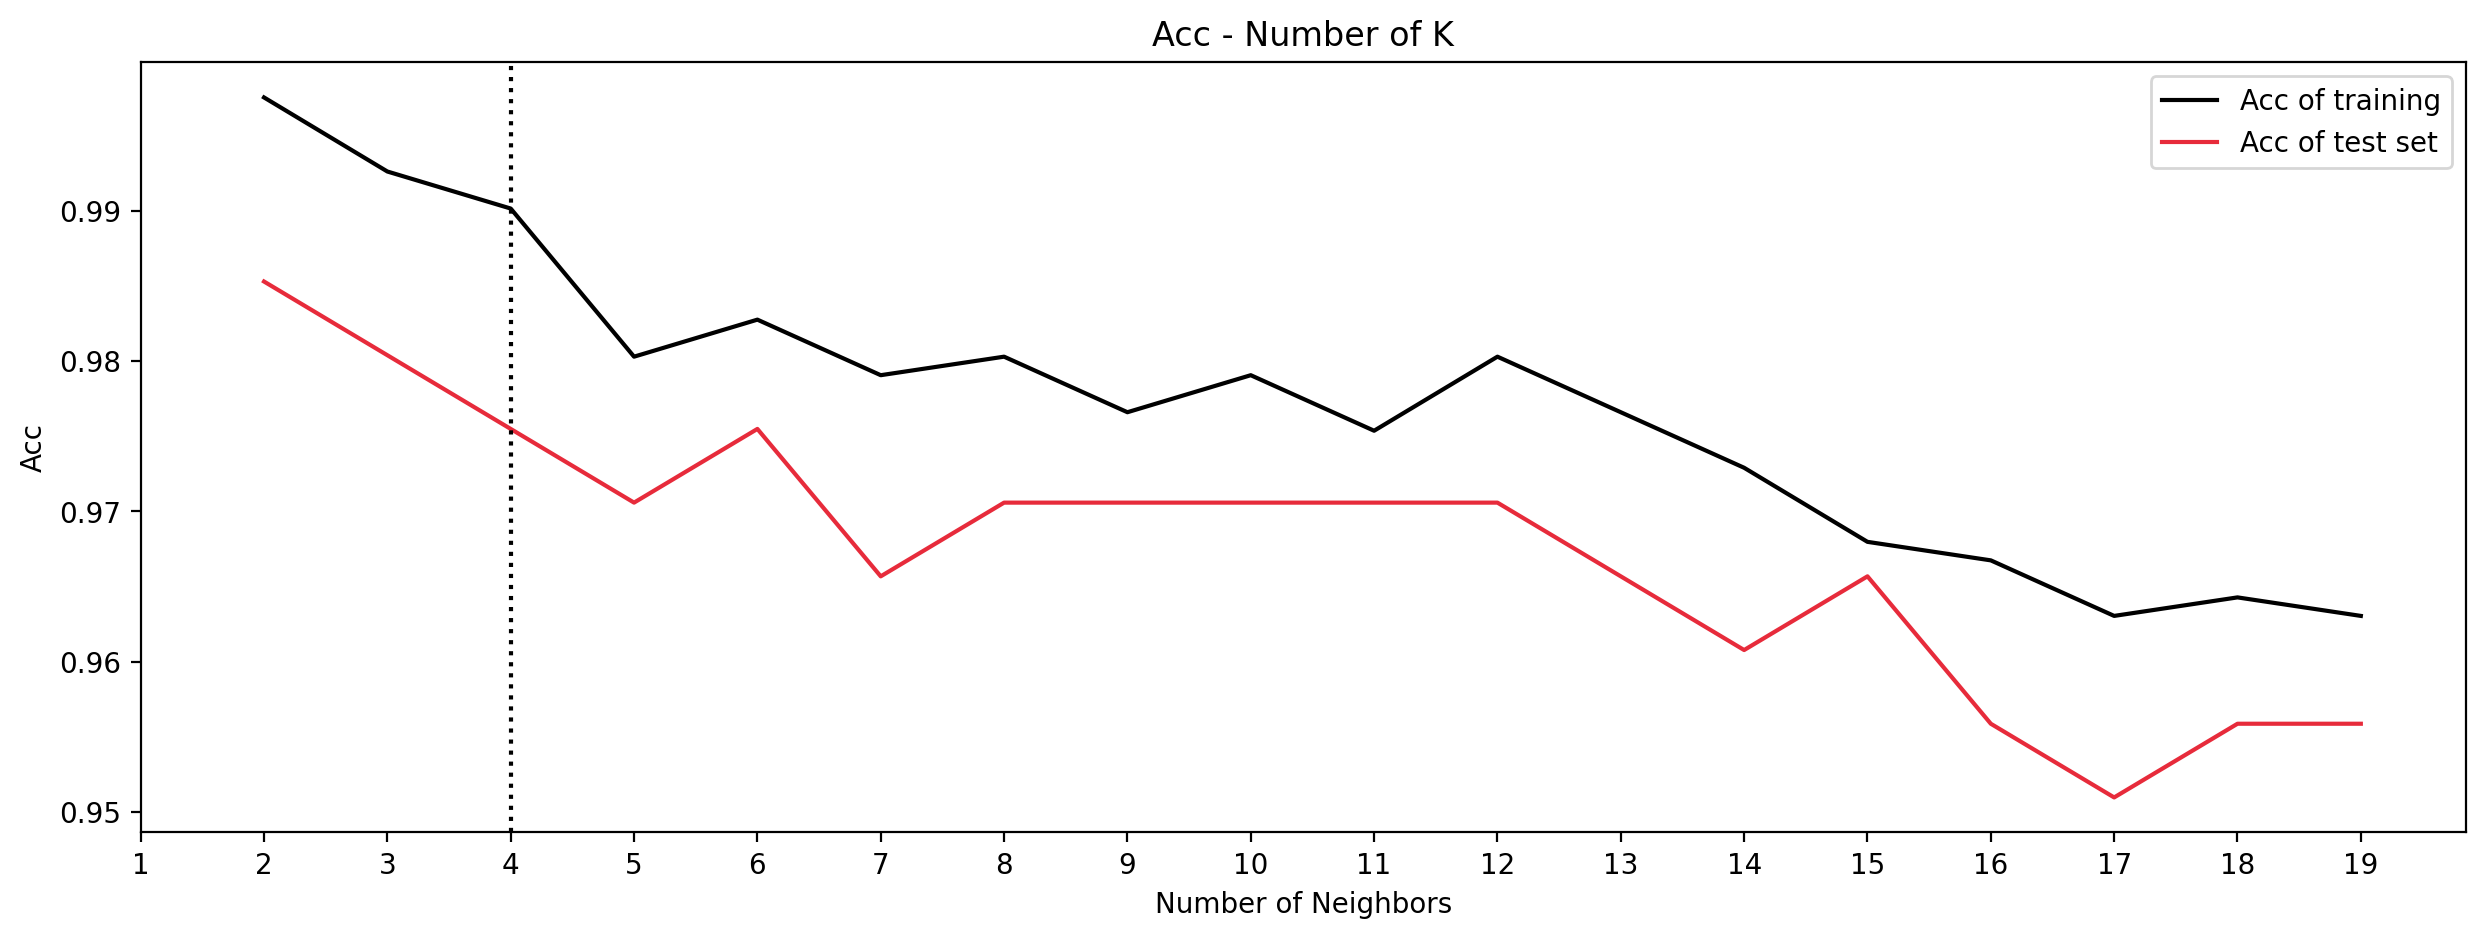

In [28]:
from sklearn.neighbors import KNeighborsClassifier


training_acc_1 = []
test_acc_1 = []

range_k = range(2,20)

for number_k in range_k:
    knn = KNeighborsClassifier(n_neighbors = number_k, p=1)
    knn.fit (X_train, y_train.ravel())
    training_acc_1.append(knn.score(X_train,y_train))
    test_acc_1.append(knn.score(X_test, y_test))


plt.figure(figsize=(15,5), dpi=200)
plt.plot(range_k, training_acc_1, label='Acc of training', color= 'black')
plt.plot(range_k, test_acc_1, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Number of Neighbors')
plt.title('Acc - Number of K')
plt.legend()
plt.xticks(range(1,20))
plt.axvline(x = 4, linestyle= 'dotted', c= 'black')
plt.show()

In [29]:
from sklearn import metrics


K = 3
model1 = KNeighborsClassifier(K, p=1)
model1.fit(X_train, y_train.ravel())
y_pred_1 = model1.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_1))
Best_knn = metrics.accuracy_score(y_test,y_pred_1)

Accuracy 0.9803921568627451


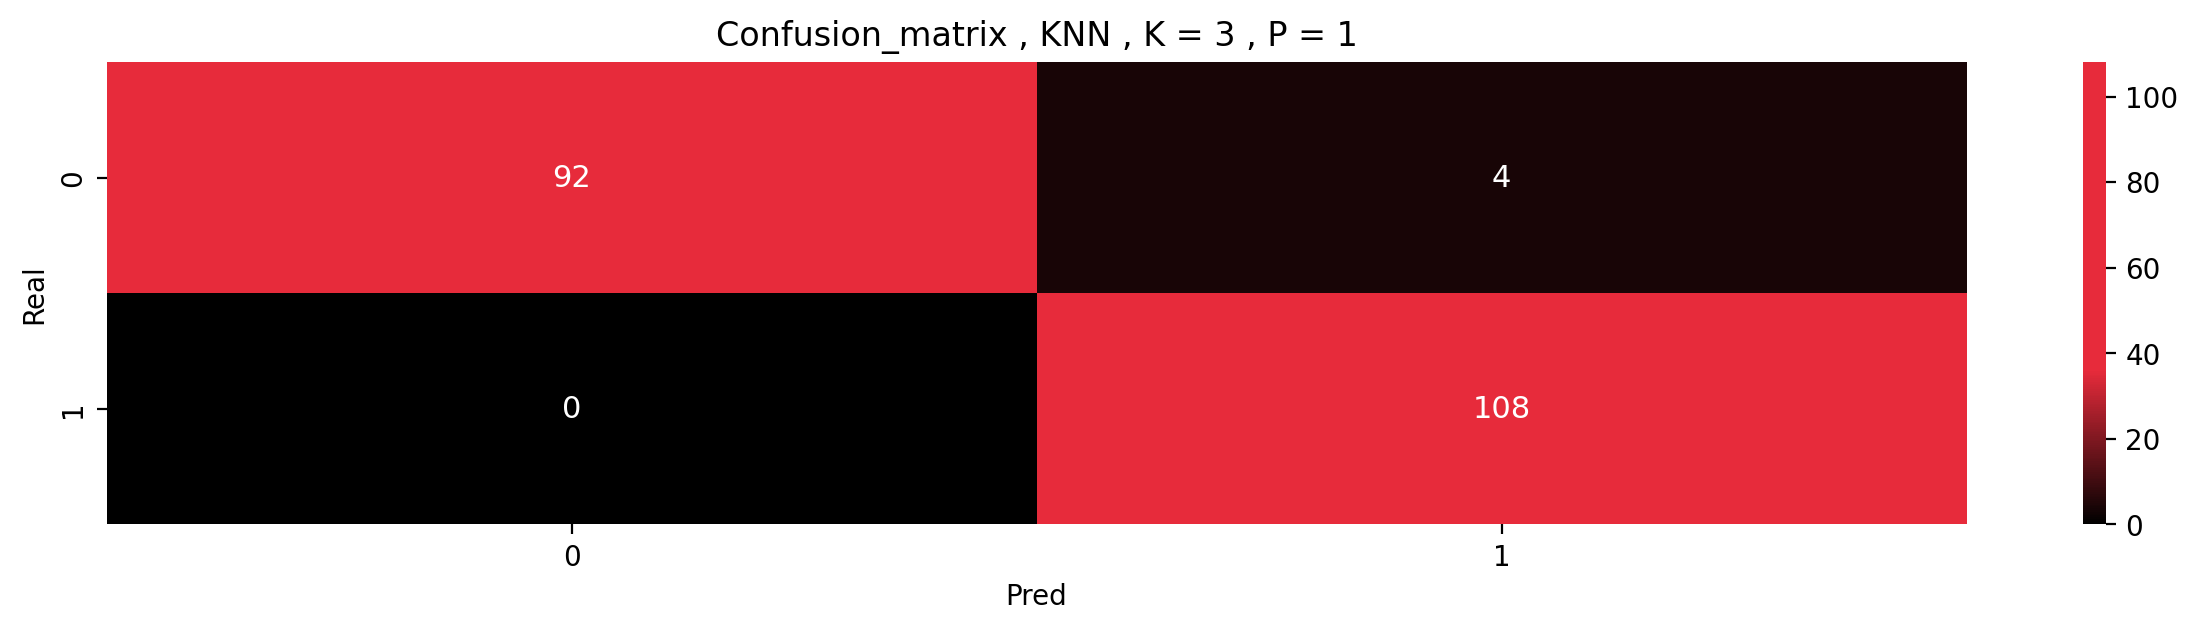

In [30]:
import matplotlib


conf_matrix_1 = confusion_matrix(y_test, y_pred_1)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix , KNN , K = 3 , P = 1")
annot = np.array([[f"{conf_matrix_1[0, 0]}", f"{conf_matrix_1[0, 1]}"],
                  [f"{conf_matrix_1[1, 0]}", f"{conf_matrix_1[1, 1]}"]], dtype=object)


sns.heatmap(conf_matrix_1,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

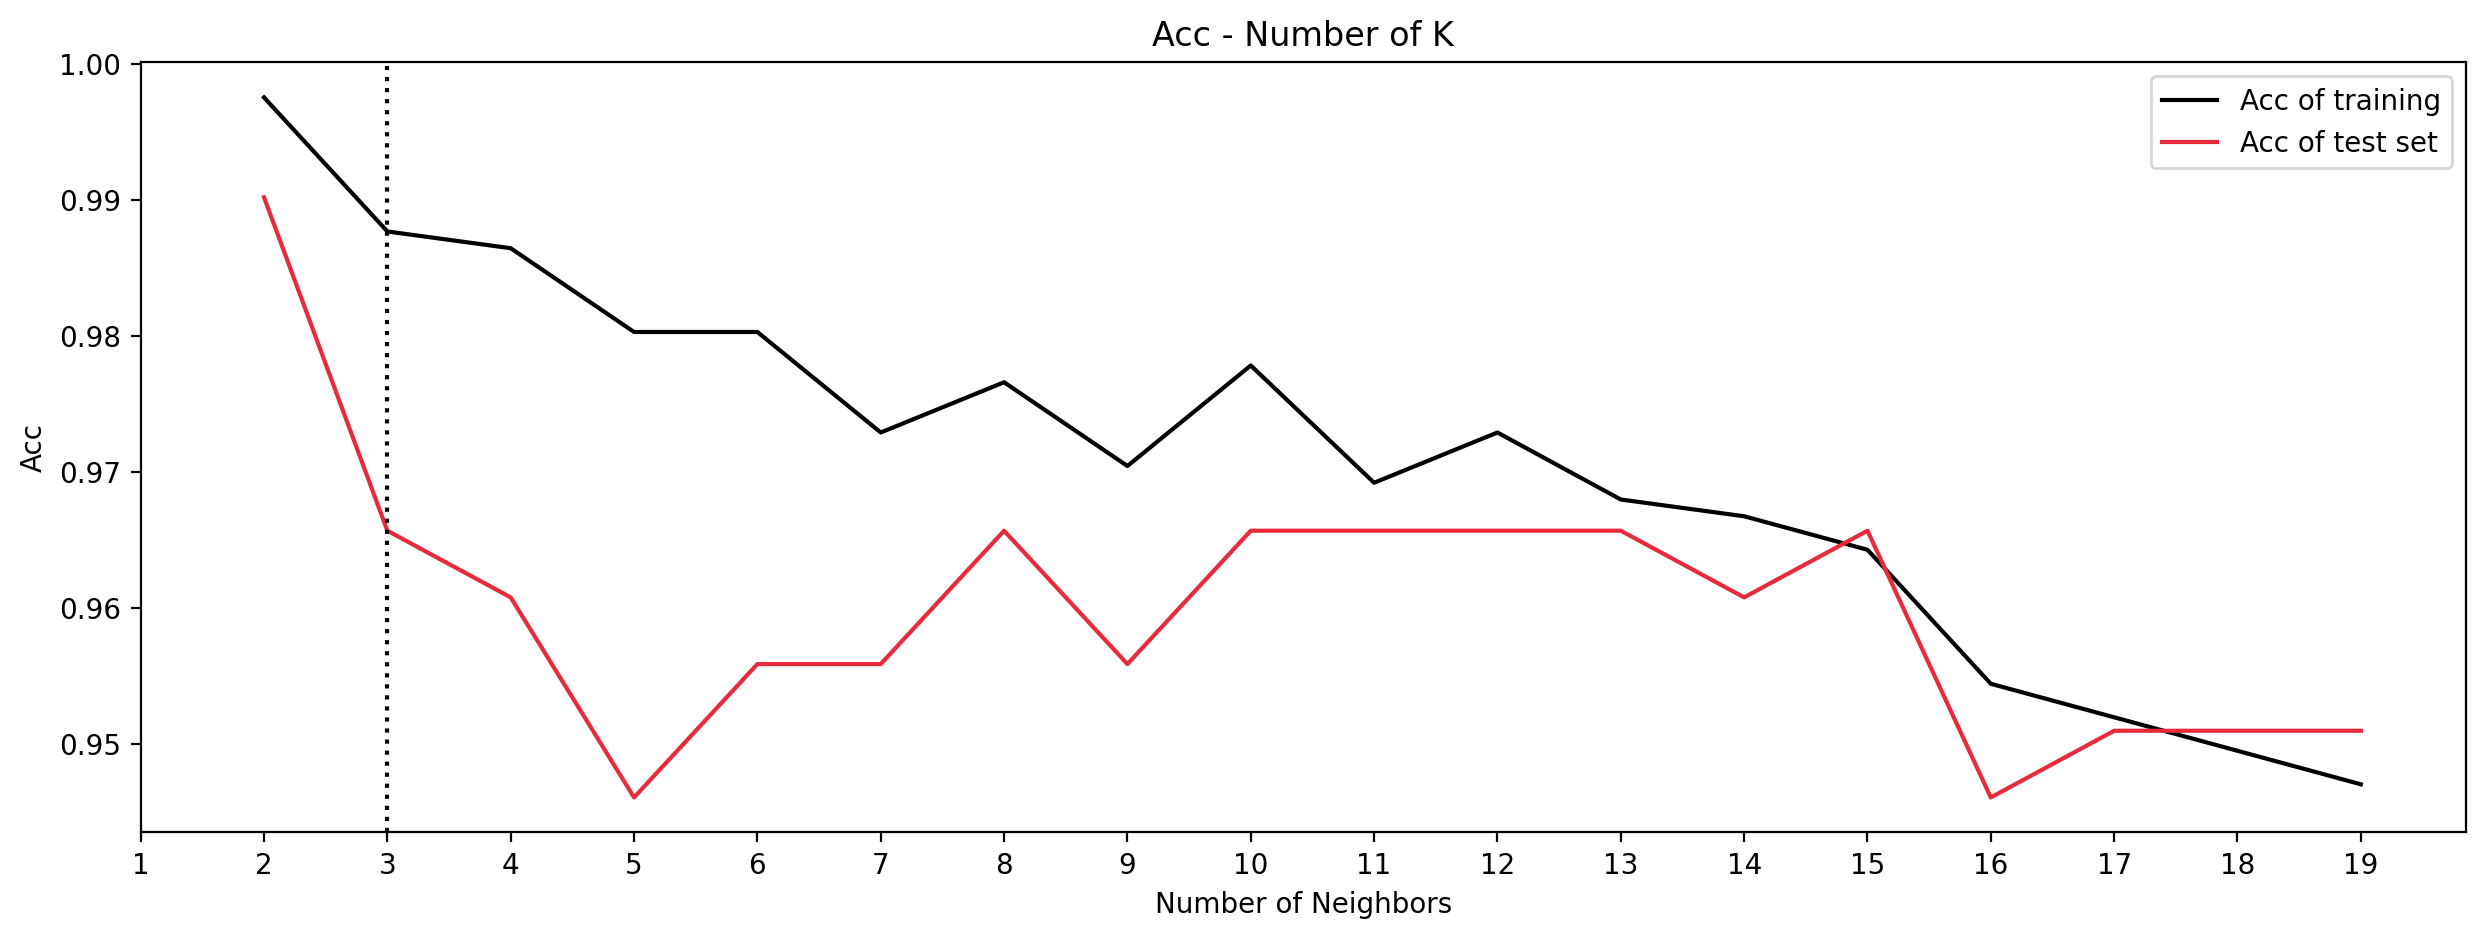

In [31]:
training_acc_2 = []
test_acc_2 = []

range_k = range(2,20)

for number_k in range_k:
    knn = KNeighborsClassifier(n_neighbors = number_k, p=2)
    knn.fit (X_train, y_train.ravel())
    training_acc_2.append(knn.score(X_train,y_train))
    test_acc_2.append(knn.score(X_test, y_test))


plt.figure(figsize=(15,5), dpi=200)
plt.plot(range_k, training_acc_2, label='Acc of training', color= 'black')
plt.plot(range_k, test_acc_2, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Number of Neighbors')
plt.title('Acc - Number of K')
plt.legend()
plt.xticks(range(1,20))
plt.axvline(x = 3, linestyle= 'dotted', c= 'black')
plt.show()

In [32]:
K = 3
model2 = KNeighborsClassifier(K, p=2)
model2.fit(X_train, y_train.ravel())
y_pred_2 = model2.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_2))

Accuracy 0.9656862745098039


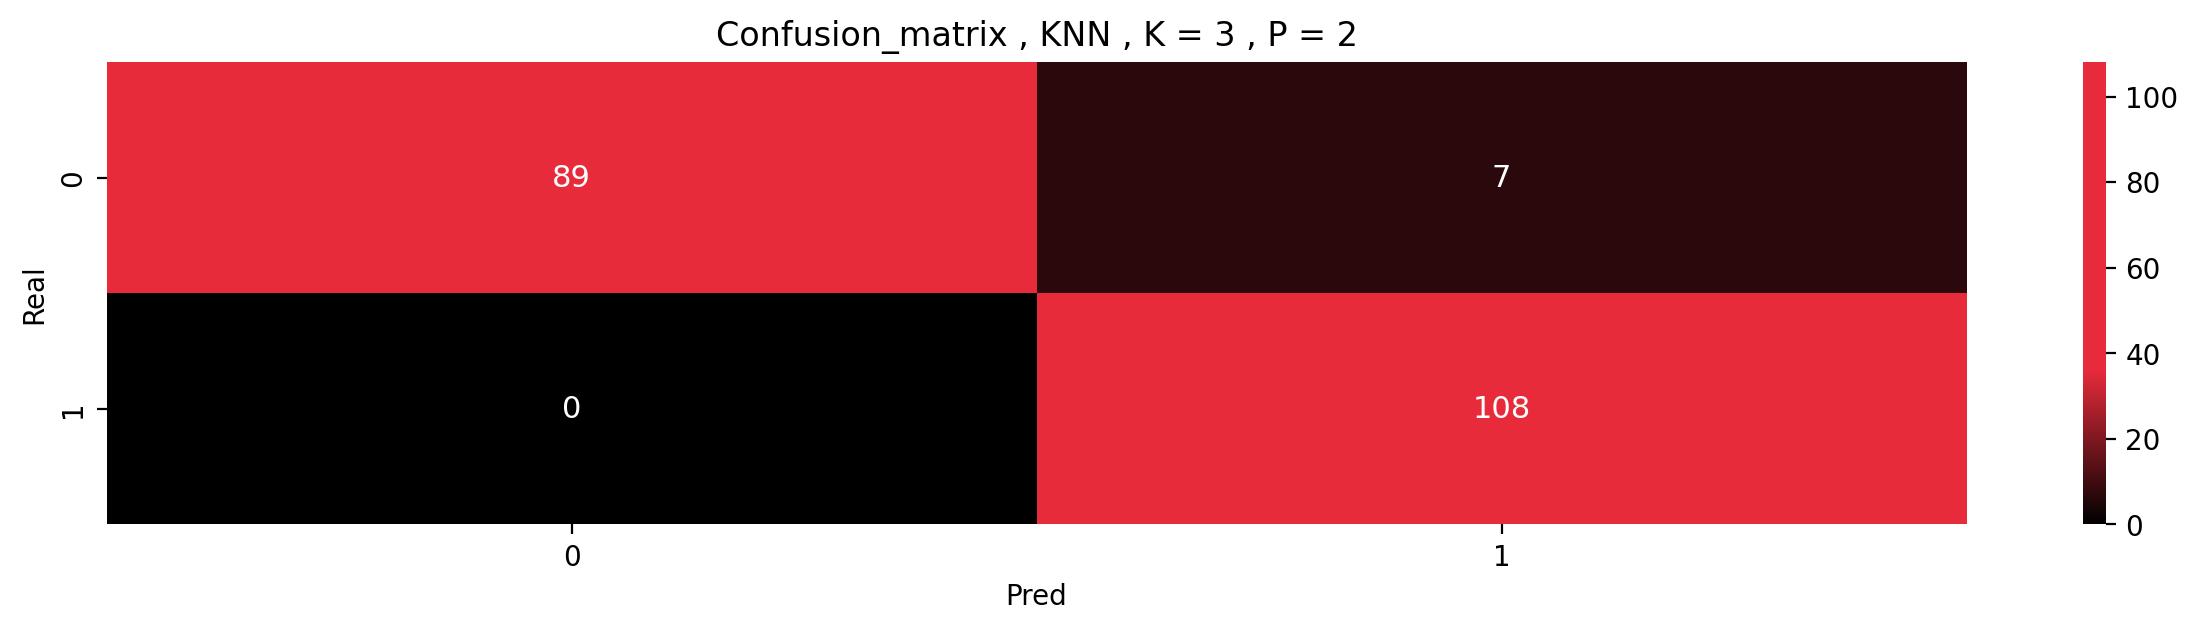

In [33]:
conf_matrix_2 = confusion_matrix(y_test, y_pred_2)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix , KNN , K = 3 , P = 2")
annot = np.array([[f"{conf_matrix_2[0, 0]}", f"{conf_matrix_2[0, 1]}"],
                  [f"{conf_matrix_2[1, 0]}", f"{conf_matrix_2[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_2,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

In [34]:
class color:
    BOLD = '\033[1m'
    END = '\033[0m'

In [35]:
print(Back.RED +color.BOLD+ "Classification report for model1 (K= 3 and p = 1):"+ Back.RESET+ color.END)
print(classification_report(y_train, model1.predict(X_train)))
print(Back.RED +color.BOLD +"Classification report for model2 (K= 3 and p = 2):"+ Back.RESET+ color.END)
print(classification_report(y_train, model2.predict(X_train)))

Classification report for model1 (K= 3 and p = 1):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       412
           1       0.99      1.00      0.99       400

    accuracy                           0.99       812
   macro avg       0.99      0.99      0.99       812
weighted avg       0.99      0.99      0.99       812

Classification report for model2 (K= 3 and p = 2):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       412
           1       0.98      1.00      0.99       400

    accuracy                           0.99       812
   macro avg       0.99      0.99      0.99       812
weighted avg       0.99      0.99      0.99       812



<div style = 'border : 3px solid non; color:#f2f2f2 ; ;padding:10px'>


* **SVM + tune hyperparameters**

  - The second algorithm is SVM. In SVM, I consider the range of C "0.05 - 50" and Kernles "Linear, Poly, RBF and sigmoid" as the hyperparameters for change. Then, I compare all of the results and scores and finally chose the best one.
    



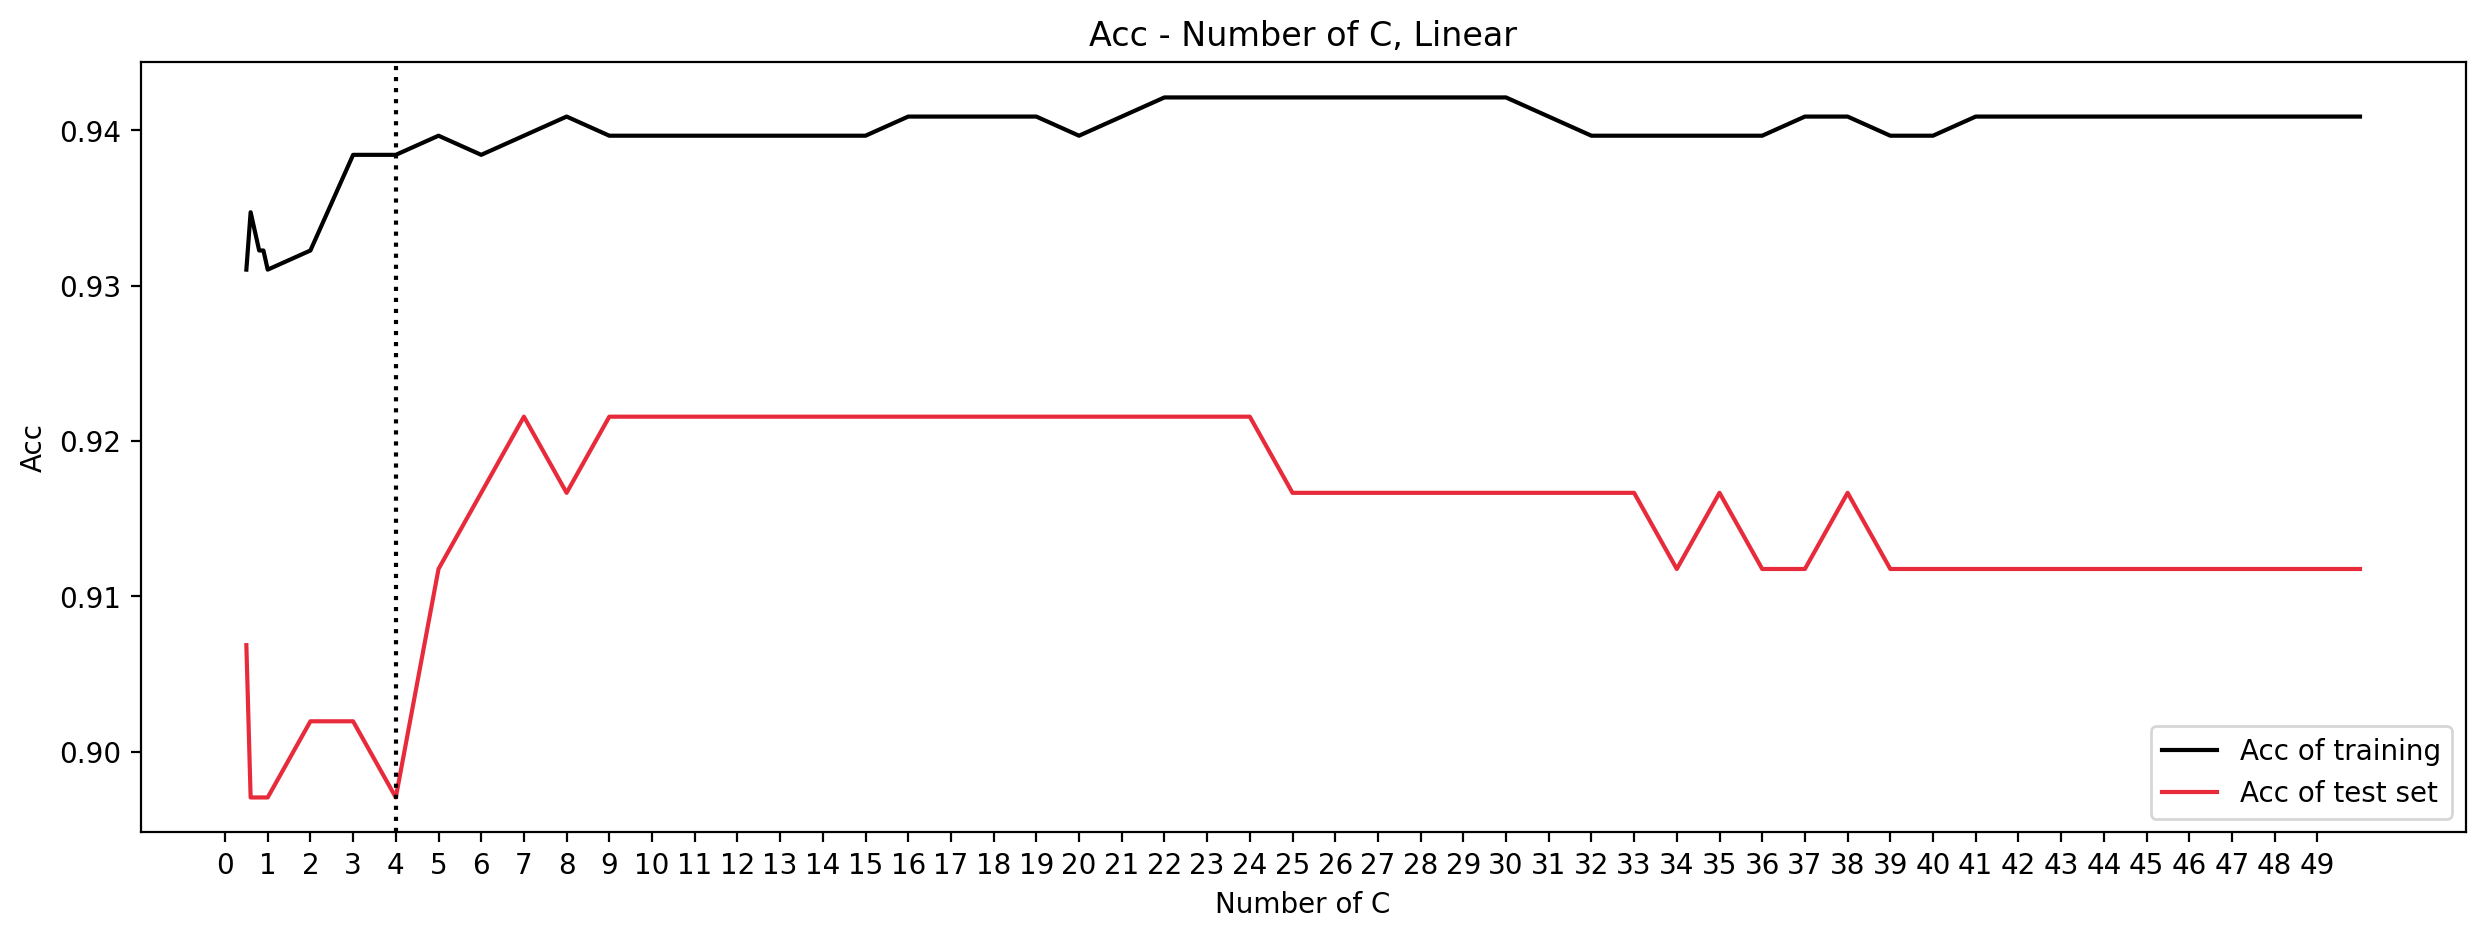

In [36]:
from sklearn.svm import SVC


training_acc_3 = []
test_acc_3 = []

C = [0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,
    26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
#Kernel = {'linear', 'poly', 'rbf', 'sigmoid'}

for C_ in C:
    SVM = SVC(C= C_, kernel= 'linear')
    SVM.fit (X_train, y_train.ravel())
    training_acc_3.append(SVM.score(X_train,y_train))
    test_acc_3.append(SVM.score(X_test, y_test))


plt.figure(figsize=(15,5), dpi=200)
plt.plot(C, training_acc_3, label='Acc of training', color= 'black')
plt.plot(C, test_acc_3, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Number of C')
plt.title('Acc - Number of C, Linear')
plt.legend()
plt.xticks(range(0,50))
plt.axvline(x = 4, linestyle= 'dotted', c= 'black')
plt.show()

In [37]:
model3 = SVC(C= 20, kernel= 'linear', probability=True)
model3.fit(X_train, y_train.ravel())
y_pred_3 = model3.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_3))
Best_SVM = metrics.accuracy_score(y_test,y_pred_3)

Accuracy 0.9215686274509803


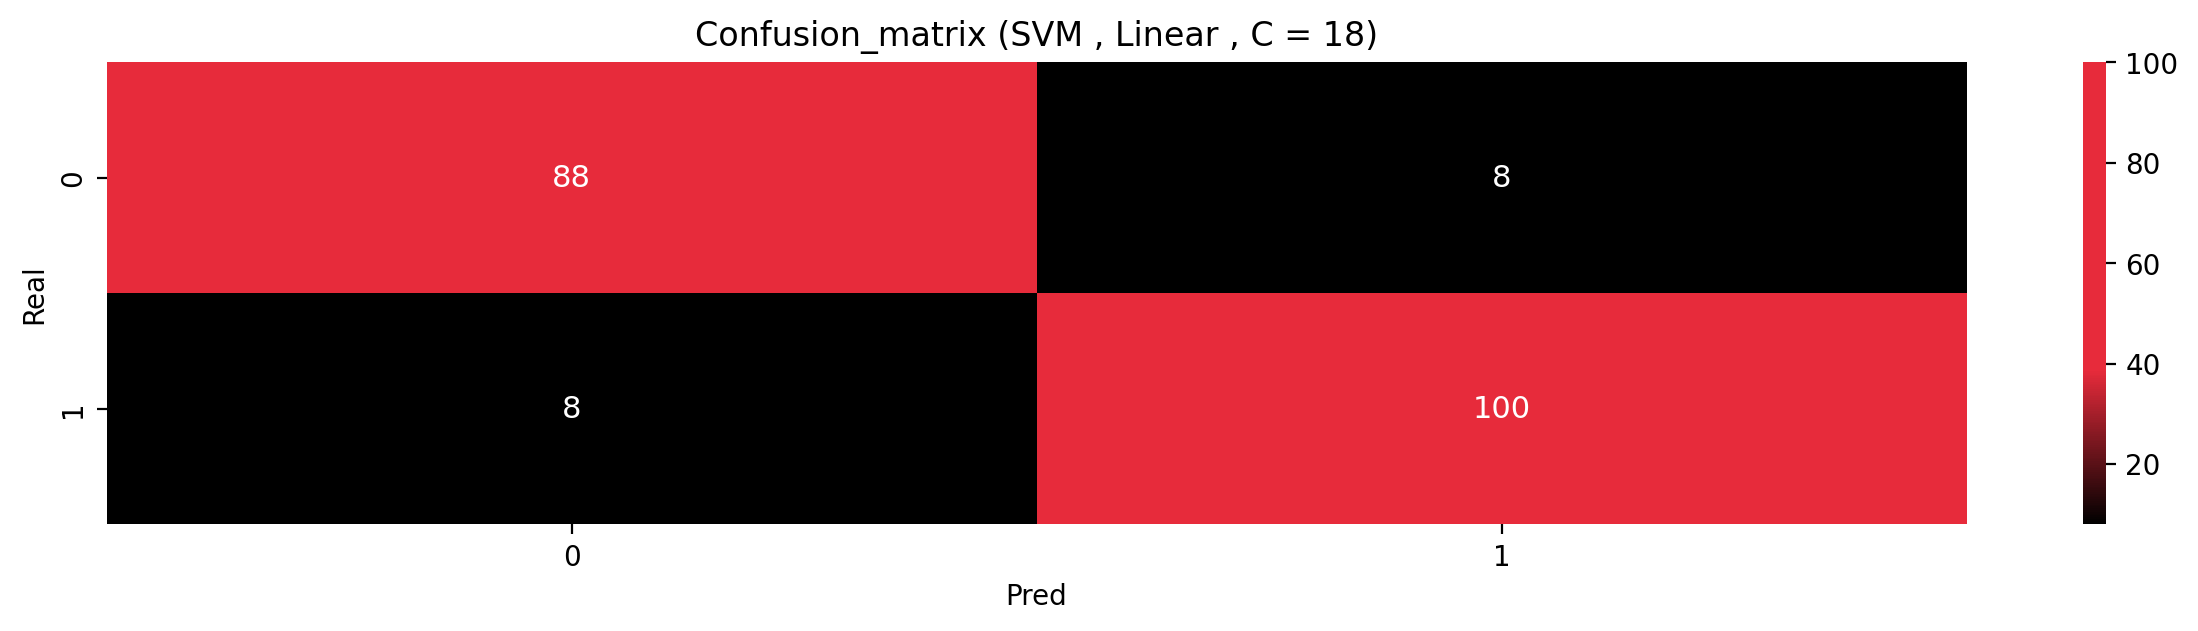

In [38]:
conf_matrix_3 = confusion_matrix(y_test, y_pred_3)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (SVM , Linear , C = 18)")
annot = np.array([[f"{conf_matrix_3[0, 0]}", f"{conf_matrix_3[0, 1]}"],
                  [f"{conf_matrix_3[1, 0]}", f"{conf_matrix_3[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_3,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

## Acc - KERNEL- Poly


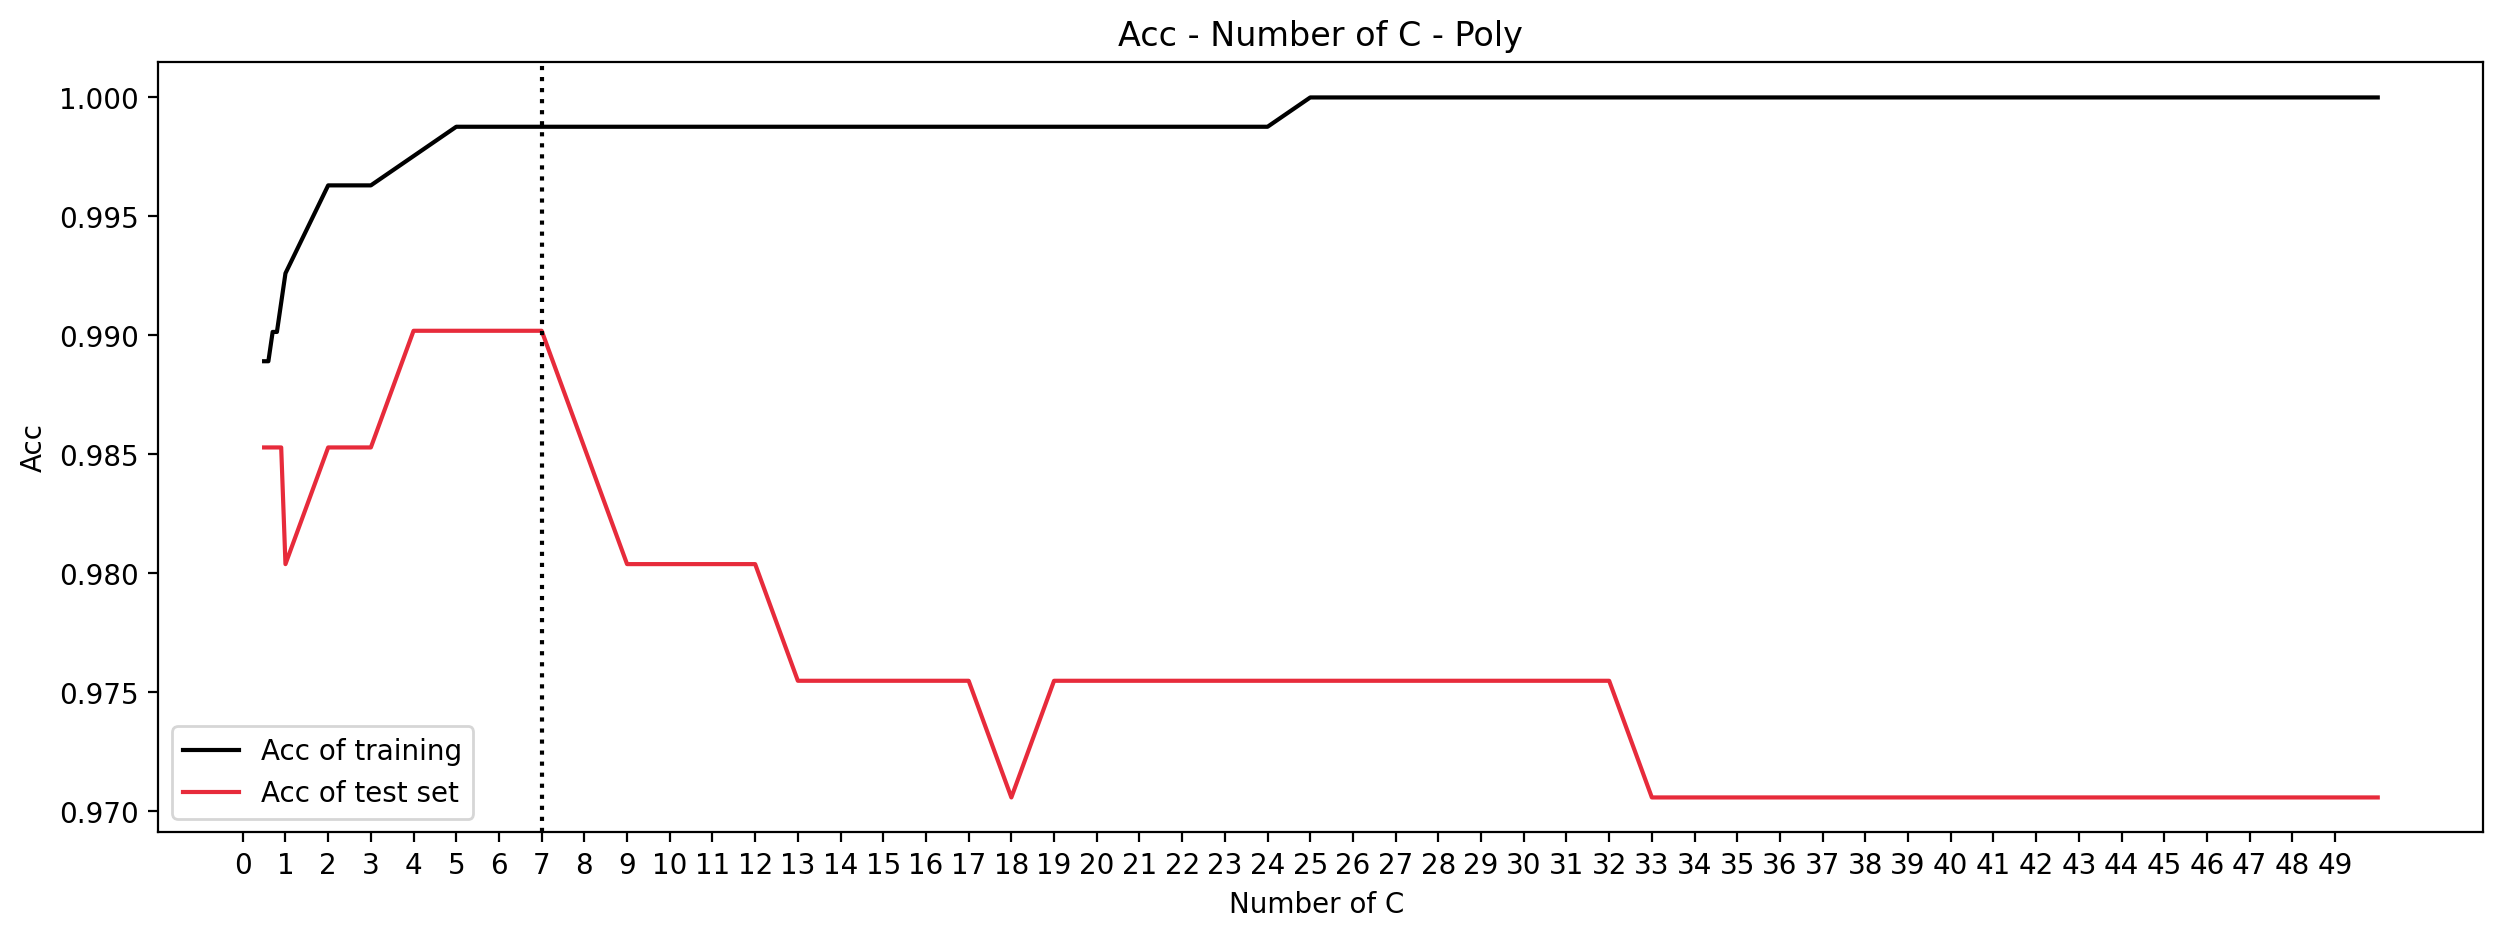

In [39]:
training_acc_4 = []
test_acc_4 = []

C = [0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,
    26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
#Kernel = {'linear', 'poly', 'rbf', 'sigmoid'}

for C_ in C:
    SVM = SVC(C= C_, kernel= 'poly')
    SVM.fit (X_train, y_train.ravel())
    training_acc_4.append(SVM.score(X_train,y_train))
    test_acc_4.append(SVM.score(X_test, y_test))


plt.figure(figsize=(15,5), dpi=200)
plt.plot(C, training_acc_4, label='Acc of training', color= 'black')
plt.plot(C, test_acc_4, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Number of C ')
plt.title('Acc - Number of C - Poly')
plt.legend()
plt.xticks(range(0,50))
plt.axvline(x = 7, linestyle= 'dotted', c= 'black')
plt.show()

In [40]:
model4 = SVC(C= 7, kernel= 'poly')
model4.fit(X_train, y_train.ravel())
y_pred_4 = model4.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_4))

Accuracy 0.9901960784313726


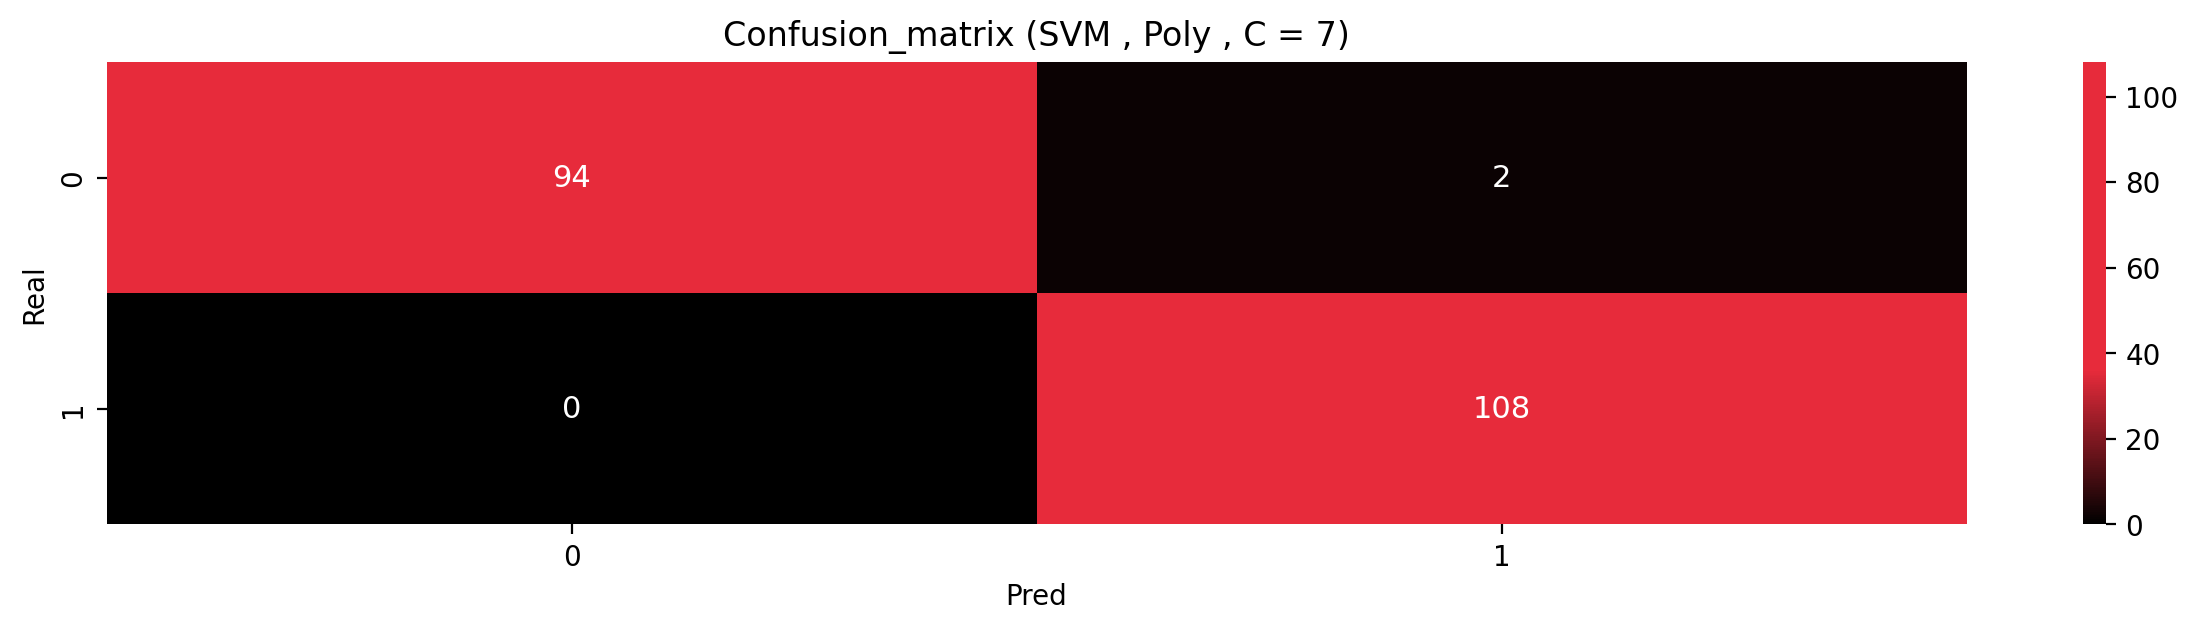

In [41]:
conf_matrix_4 = confusion_matrix(y_test, y_pred_4)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (SVM , Poly , C = 7)")
annot = np.array([[f"{conf_matrix_4[0, 0]}", f"{conf_matrix_4[0, 1]}"],
                  [f"{conf_matrix_4[1, 0]}", f"{conf_matrix_4[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_4,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

# KERNAL ----> SIGMOID

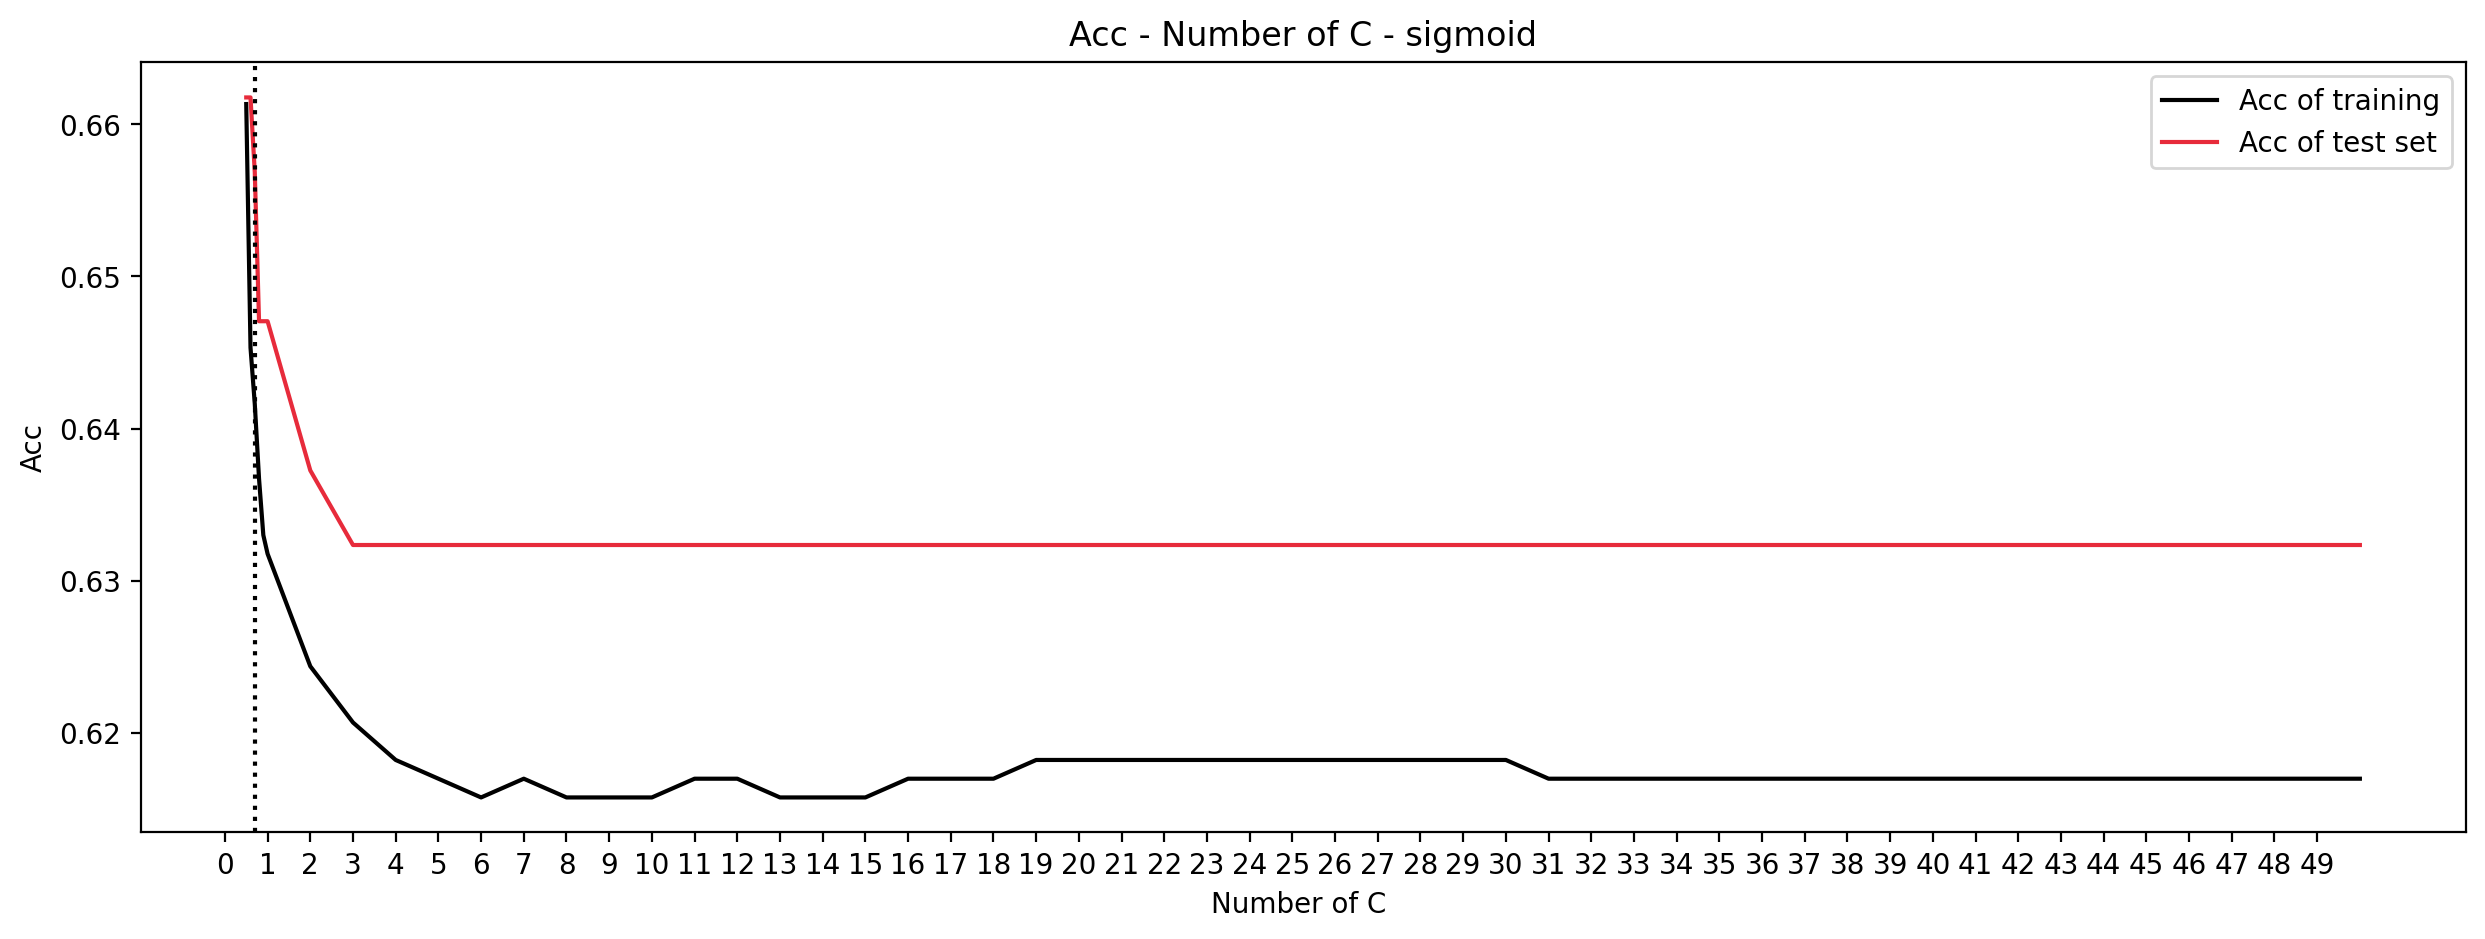

In [42]:
training_acc_5 = []
test_acc_5 = []

C = [0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,
    26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
#Kernel = {'linear', 'poly', 'rbf', 'sigmoid'}

for C_ in C:
    SVM = SVC(C= C_, kernel= 'sigmoid')
    SVM.fit (X_train, y_train.ravel())
    training_acc_5.append(SVM.score(X_train,y_train))
    test_acc_5.append(SVM.score(X_test, y_test))


plt.figure(figsize=(15,5), dpi=200)
plt.plot(C, training_acc_5, label='Acc of training', color= 'black')
plt.plot(C, test_acc_5, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Number of C ')
plt.title('Acc - Number of C - sigmoid')
plt.legend()
plt.xticks(range(0,50))
plt.axvline(x =0.7, linestyle= 'dotted', c= 'black')
plt.show()

In [43]:
model5 = SVC(C= 0.7, kernel= 'sigmoid')
model5.fit(X_train, y_train.ravel())
y_pred_5 = model5.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_5))

Accuracy 0.6568627450980392


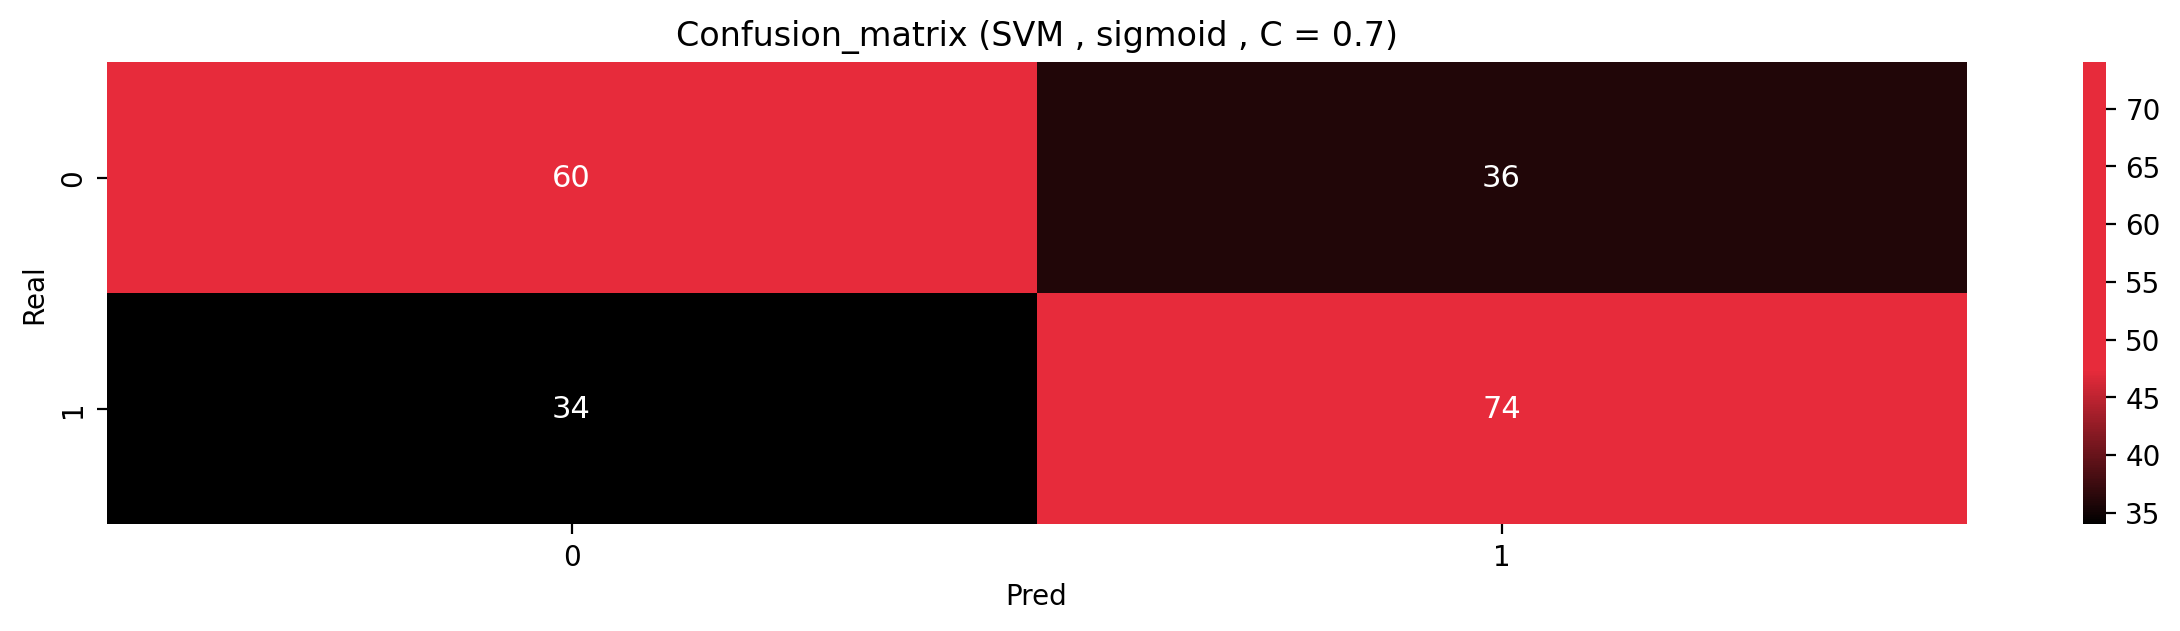

In [44]:
conf_matrix_5 = confusion_matrix(y_test, y_pred_5)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (SVM , sigmoid , C = 0.7)")
annot = np.array([[f"{conf_matrix_5[0, 0]}", f"{conf_matrix_5[0, 1]}"],
                  [f"{conf_matrix_5[1, 0]}", f"{conf_matrix_5[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_5,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

In [45]:
print(Back.RED +color.BOLD+ "Classification report for model3 (Svm, kernel = Linear, C = 20):"+ Back.RESET+ color.END)
print(classification_report(y_train, model3.predict(X_train)))
print(Back.RED +color.BOLD +"Classification report for model4 (Svm, kernel = Poly, C = 2):"+ Back.RESET+ color.END)
print(classification_report(y_train, model4.predict(X_train)))
print(Back.RED +color.BOLD +"Classification report for model5 (Svm, kernel = Sigmoid, C = 0.7):"+ Back.RESET+ color.END)
print(classification_report(y_train, model5.predict(X_train)))

Classification report for model3 (Svm, kernel = Linear, C = 20):
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       412
           1       0.95      0.93      0.94       400

    accuracy                           0.94       812
   macro avg       0.94      0.94      0.94       812
weighted avg       0.94      0.94      0.94       812

Classification report for model4 (Svm, kernel = Poly, C = 2):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       412
           1       1.00      1.00      1.00       400

    accuracy                           1.00       812
   macro avg       1.00      1.00      1.00       812
weighted avg       1.00      1.00      1.00       812

Classification report for model5 (Svm, kernel = Sigmoid, C = 0.7):
              precision    recall  f1-score   support

           0       0.65      0.64      0.64       412
           1       0.63      0.64      0.64

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; color:black ;padding:10px'>


* **Decision Trees + tune hyperparameters**

  - The third algorithm is Decision trees. In DT, I consider the range of max depth "1 - 20" and Criterions "gini, entropy and log_loss" as the hyperparameters for change. Then, I compare all of the results and scores and finally chose the best one.
    



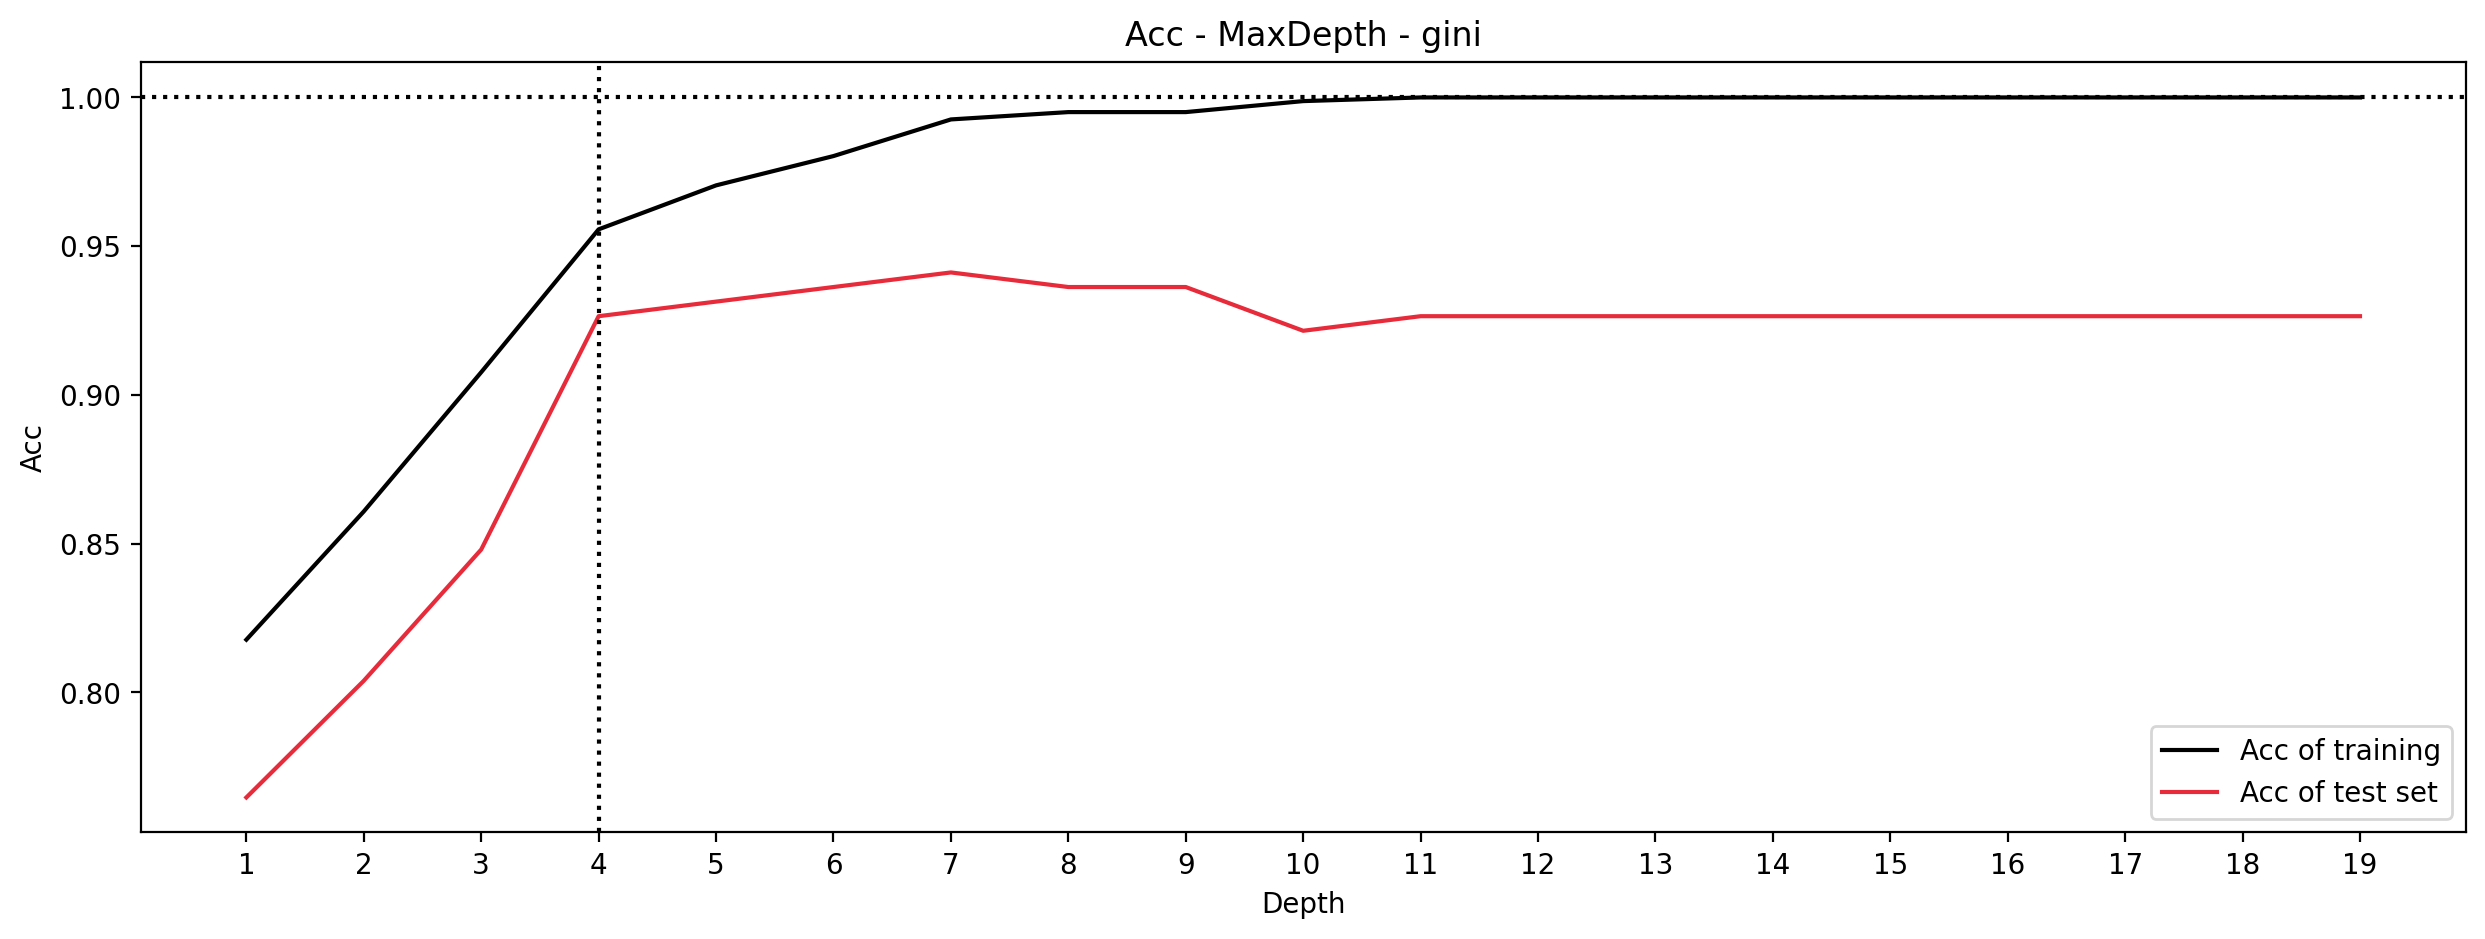

In [46]:
training_acc_6 = []
test_acc_6 = []

max_depth = range(1,20)
#Criterion = gini, entropy, log_loss

for depth in max_depth:
    DT = DecisionTreeClassifier(max_depth= depth, criterion= 'gini', random_state=40)
    DT.fit (X_train, y_train.ravel())
    training_acc_6.append(DT.score(X_train,y_train))
    test_acc_6.append(DT.score(X_test, y_test))


plt.figure(figsize=(15,5), dpi=200)
plt.plot(max_depth, training_acc_6, label='Acc of training', color= 'black')
plt.plot(max_depth, test_acc_6, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Depth')
plt.title('Acc - MaxDepth - gini')
plt.legend()
plt.xticks(range(1,20))
plt.axvline(x =4, linestyle= 'dotted', c= 'black')
plt.axhline(y =1, linestyle= 'dotted', c= 'black')
plt.show();

In [47]:
model6 = DecisionTreeClassifier(max_depth = 4 , criterion= 'gini', random_state=40)
model6.fit(X_train, y_train.ravel())
y_pred_6 = model6.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_6))
Best_DT = metrics.accuracy_score(y_test,y_pred_6)

Accuracy 0.9264705882352942


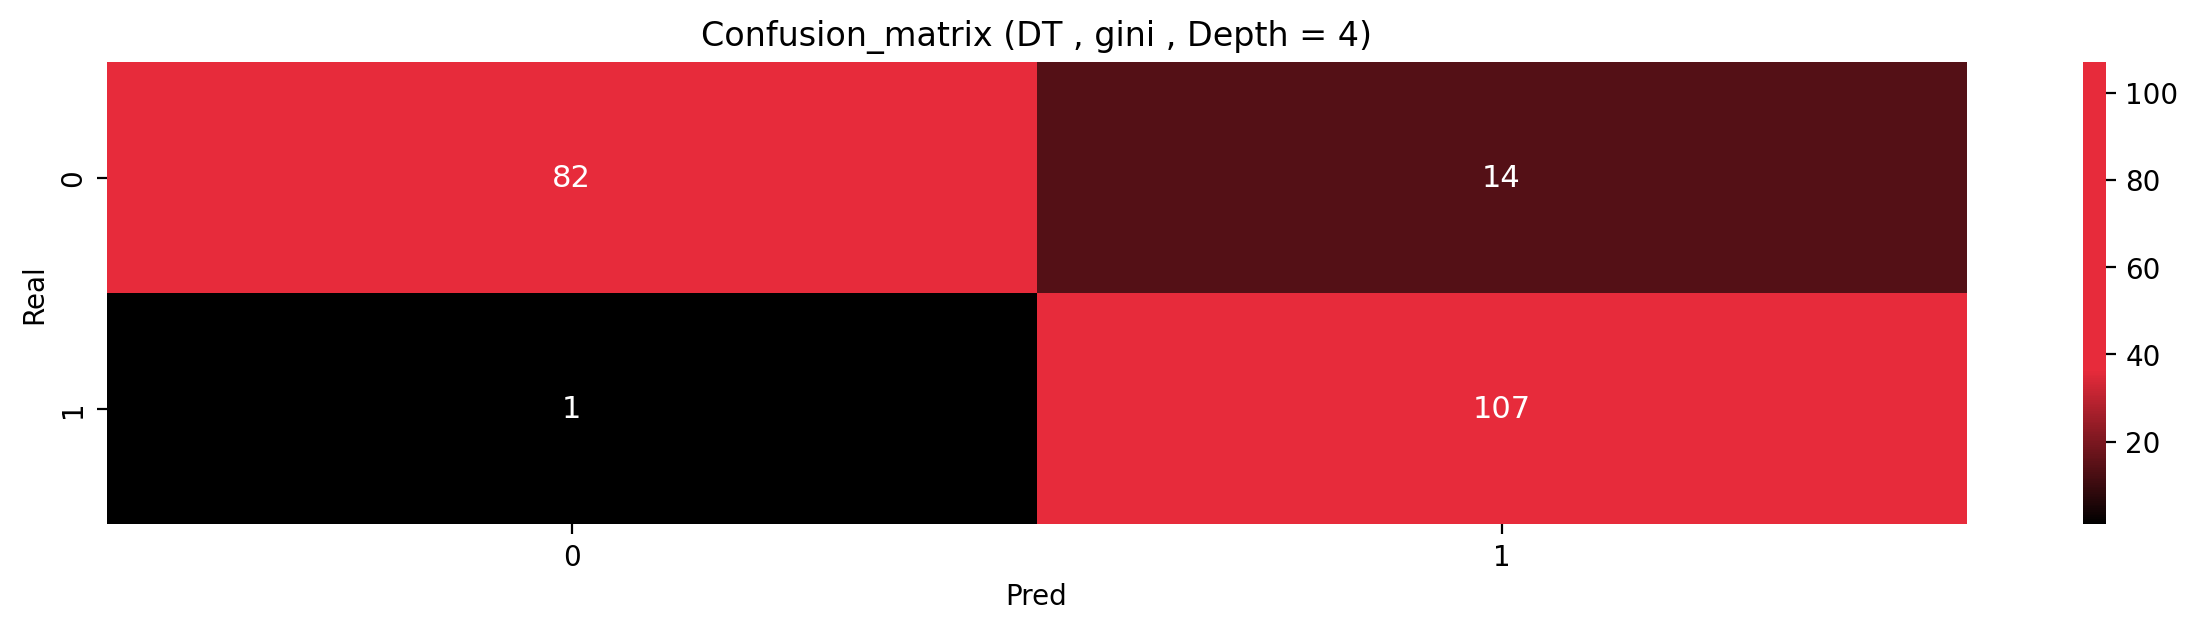

In [48]:
conf_matrix_6 = confusion_matrix(y_test, y_pred_6)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (DT , gini , Depth = 4)")
annot = np.array([[f"{conf_matrix_6[0, 0]}", f"{conf_matrix_6[0, 1]}"],
                  [f"{conf_matrix_6[1, 0]}", f"{conf_matrix_6[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_6,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

In [49]:
print(Back.RED +color.BOLD+ "Classification report for model6 (DT, criterion = gini, Depth = 4):"+ Back.RESET+ color.END)
print(classification_report(y_train, model6.predict(X_train)))

Classification report for model6 (DT, criterion = gini, Depth = 4):
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       412
           1       0.92      0.99      0.96       400

    accuracy                           0.96       812
   macro avg       0.96      0.96      0.96       812
weighted avg       0.96      0.96      0.96       812



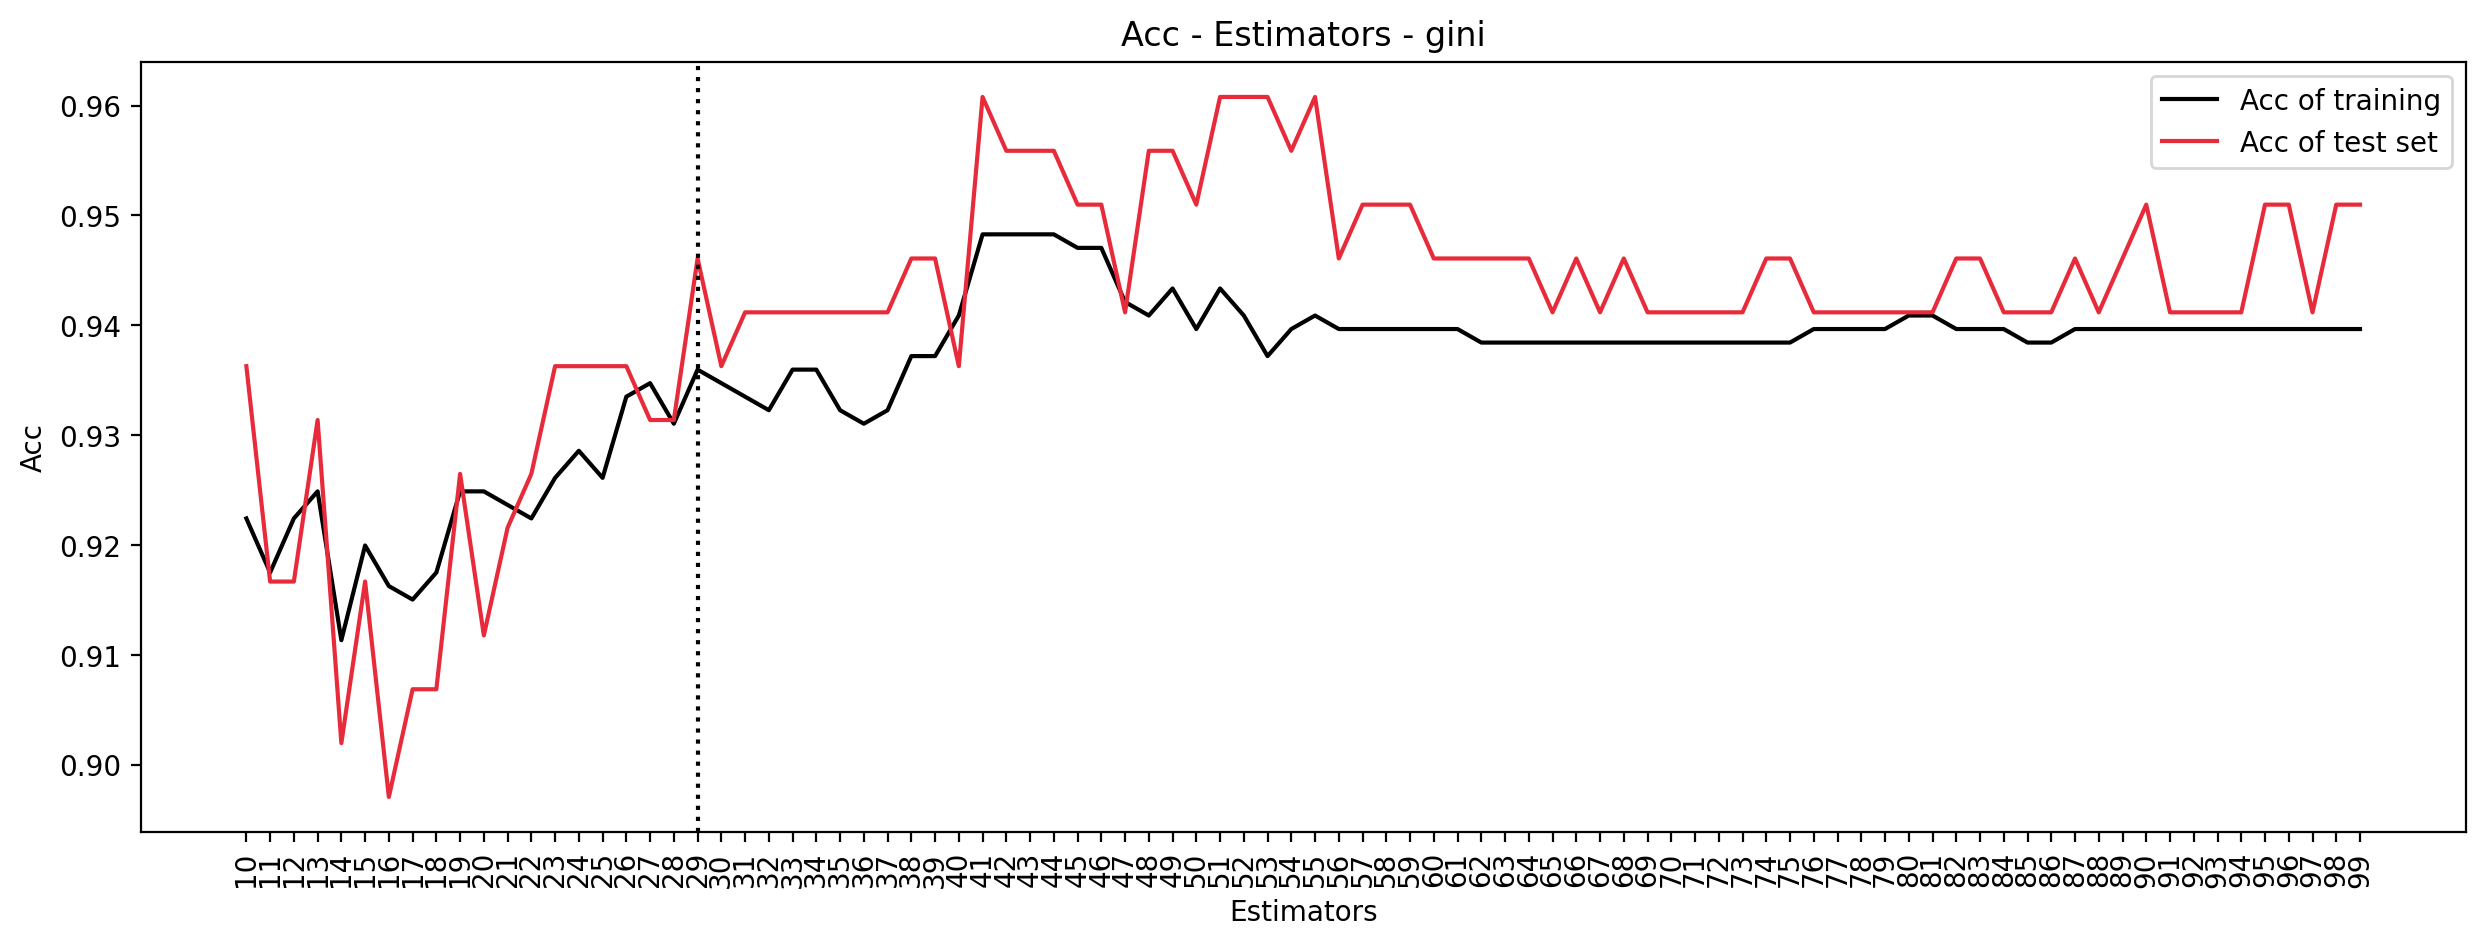

In [50]:
training_acc_7 = []
test_acc_7 = []

n_estimators = range(10,100)
#Criterion = gini, entropy

for estimator in n_estimators:
    RF = RandomForestClassifier(n_estimators= estimator, criterion= 'gini', random_state=40, max_depth= 2)
    RF.fit (X_train, y_train.ravel())
    training_acc_7.append(RF.score(X_train,y_train))
    test_acc_7.append(RF.score(X_test, y_test))


plt.figure(figsize=(15,5), dpi=200)
plt.plot(n_estimators, training_acc_7, label='Acc of training', color= 'black')
plt.plot(n_estimators, test_acc_7, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Estimators')
plt.title('Acc - Estimators - gini')
plt.legend()
plt.xticks(range(10, 100), rotation=90)
plt.axvline(x =29, linestyle= 'dotted', c= 'black')
plt.show();

In [51]:
model7 = RandomForestClassifier(max_depth = 2, criterion= 'gini', random_state=40, n_estimators= 29)
model7.fit(X_train, y_train.ravel())
y_pred_7 = model7.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_7))
Best_RF = metrics.accuracy_score(y_test,y_pred_7)

Accuracy 0.946078431372549


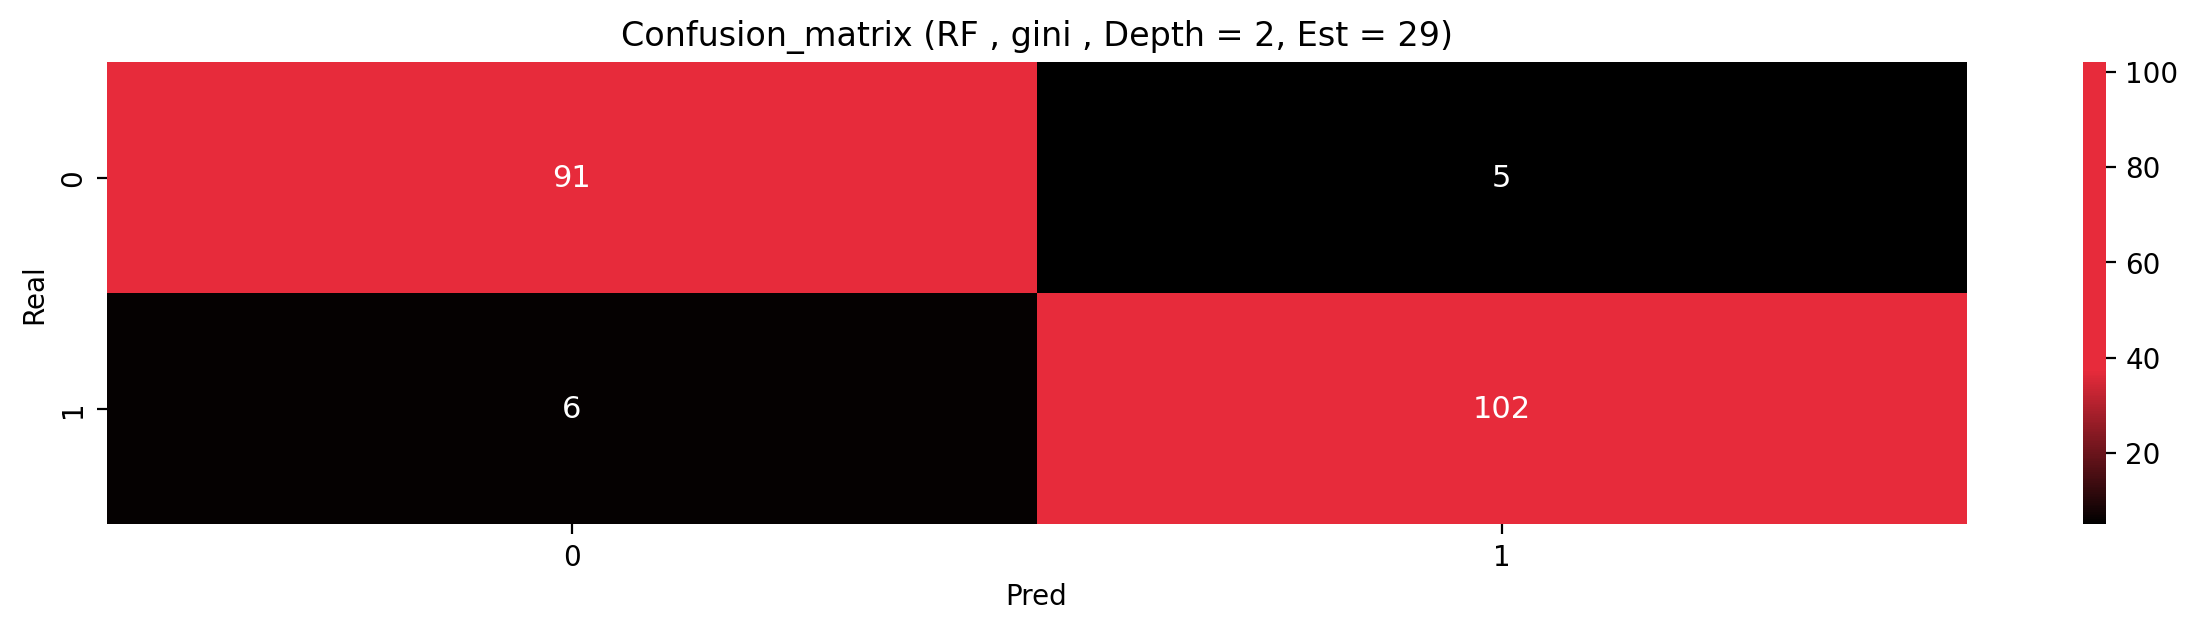

In [52]:
conf_matrix_7 = confusion_matrix(y_test, y_pred_7)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (RF , gini , Depth = 2, Est = 29)")
annot = np.array([[f"{conf_matrix_7[0, 0]}", f"{conf_matrix_7[0, 1]}"],
                  [f"{conf_matrix_7[1, 0]}", f"{conf_matrix_7[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_7,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

In [53]:
print(Back.RED +color.BOLD+ "Classification report for model7 (RF, criterion = gini, Depth = 2, N_Estimators = 16):"
      + Back.RESET+ color.END)
print(classification_report(y_train, model7.predict(X_train)))


Classification report for model7 (RF, criterion = gini, Depth = 2, N_Estimators = 16):
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       412
           1       0.92      0.95      0.94       400

    accuracy                           0.94       812
   macro avg       0.94      0.94      0.94       812
weighted avg       0.94      0.94      0.94       812



<a id="6"></a>
# <p style="padding:10px;background-color:white ;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Conclusion</p>

In [54]:



Best_models = pd.DataFrame({'Best_models_acc': [Best_DT, Best_knn, Best_RF],
               'Best_models_name': ('Decision tree', 'KNN', 'Random Forest')})
Best_models.sort_values(by='Best_models_acc',ascending=False ,inplace = True)
Best_models

,Best_models_acc,Best_models_name
1,0.980392,KNN
2,0.946078,Random Forest
0,0.926471,Decision tree


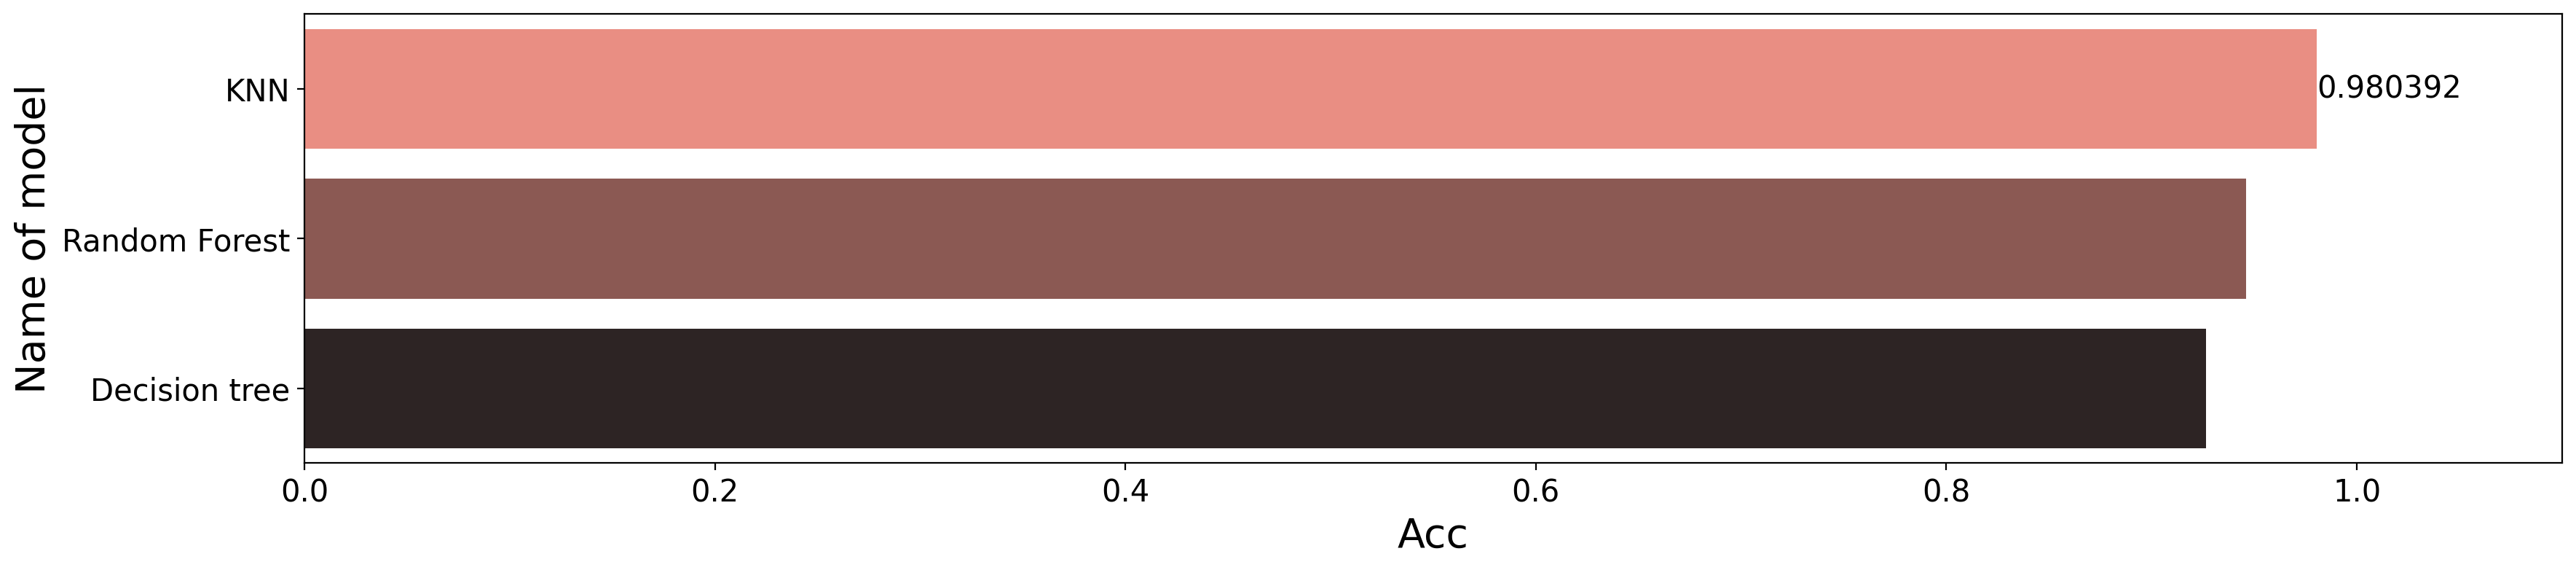

In [55]:
plt.figure(figsize=(20,4),dpi=200)
ax = sns.barplot(x= Best_models['Best_models_acc'], y= Best_models['Best_models_name'], palette="dark:salmon_r")
ax.bar_label(ax.containers[0],fontsize=15)
plt.xlabel("Acc",fontsize=20)
plt.ylabel("Name of model", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_xlim([0, 1.1])
plt.show()

In [56]:
import joblib
notebook_directory = os.getcwd()
parent_directory = os.path.dirname(notebook_directory)
filepath = os.path.join(parent_directory, "pklfiles", "Hepetitis.pkl")

joblib.dump(model3,filepath)

['c:\\Users\\Divyansh Dev\\OneDrive\\Desktop\\medicare\\ml flask backend\\pklfiles\\Hepetitis.pkl']